# Predict House Price Regression

In [1]:
### Tabnine Installition For Jupyter Notebook
#pip3 install jupyter-tabnine --user
#jupyter nbextension install --py jupyter_tabnine --user
#jupyter nbextension enable --py jupyter_tabnine --user
#jupyter serverextension enable --py jupyter_tabnine --user

In [2]:
#pip install warnings

In [3]:
### Kütüphanelerin Yüklenmesi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
from PIL import Image

In [5]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [6]:
## Csv File ların Variable Atanması ve Concanate Edilmesi 
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df=pd.concat([df_test,df_train],ignore_index=True)

# Normalization and Standardization

In [7]:
##Her Seferinde Tek Tek Yazmak Yerine Bi tane Function işimizi Görecektir. DataType bağlı Cond. Çalıştırır.
def fnc_Column_Analysis (pcolumn):
    if(df[pcolumn].dtype == 'O'):
        print('Data Type String')
        print(pcolumn,'Unique List..................................:',df[pcolumn].unique())
        print(pcolumn,'Mode List....................................:',df[pcolumn].mode())
        print(pcolumn,'NullCount List...............................:',df[pcolumn].isnull().sum())      
        
        df[pcolumn].value_counts().plot.bar()
        
        if df[pcolumn].isnull().sum()>0:
            print('Na Dönüşümü Yapıldı')
            df[pcolumn].fillna(df[pcolumn].mode()[0], inplace=True)
        
    elif(df[pcolumn].dtype != 'O'):
        print('Data Type integer')        
        print(pcolumn,'Mode List....................................:',df[pcolumn].mode())
        print(pcolumn,'NullCount List...............................:',df[pcolumn].isnull().sum())
        
        sns.boxplot(df[pcolumn])

        if df[pcolumn].isnull().sum()>0:
            print('Na Dönüşümü Yapıldı')
            df[pcolumn].fillna(df[pcolumn].mean(), inplace=True)        
            ##df.LotFrontage.fillna(df.LotFrontage.mean(),inplace=True)
        

# EDA ( Exploratory Data Analysis )

In [8]:
df_train.shape,df_test.shape,df.shape ##Kolon ve kayıt SAyılarına bakıyoruz

((1460, 81), (1459, 80), (2919, 81))

In [9]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [10]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [12]:
## SalePrice Alanına göre Yüzdesel Doluluk Orannın Çıkartıyoruz.
abs(df.corr()['SalePrice']).sort_values(ascending=False) ##SalePrice Kolonuna göre Yüzdesel dağımlılımı gösterir

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

In [13]:
##Kolonlardaki BoşKayıtlara Bakıyoruz ve büyükten küçüğe göre sıralıuoruz
df.isnull().sum().sort_values(ascending=False).head(40) 

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageCond        159
GarageYrBlt       159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
BsmtHalfBath        2
BsmtFullBath        2
Utilities           2
BsmtFinSF1          1
BsmtFinSF2          1
SaleType            1
Electrical          1
GarageCars          1
TotalBsmtSF         1
GarageArea          1
Exterior2nd         1
Exterior1st         1
KitchenQual         1
BsmtUnfSF           1
Fireplaces          0
TotRmsAbvGrd        0
SaleCondition       0
OpenPorchSF         0
YrSold              0
dtype: int64

In [14]:
df.shape ##Kolonların Silindiğinden Emin Olmamız İçin Ekledik.

(2919, 81)

# Feature Engineering

# Detect and Remove the Outliers

# <img src='outliers.jpg'>

<AxesSubplot:xlabel='SalePrice', ylabel='YearBuilt'>

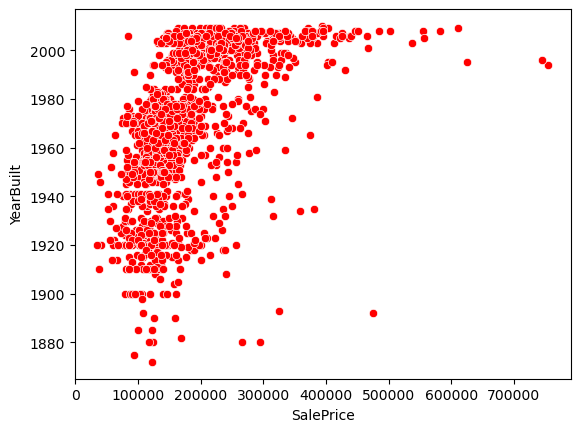

In [15]:
##Yıllara göre Fiyat Dağılımını Görmüş olıuuorz.
sns.scatterplot(x='SalePrice',y='YearBuilt',data=df,color='r')

###### 2.	MSSubClass: The building class

<AxesSubplot:xlabel='MSSubClass'>

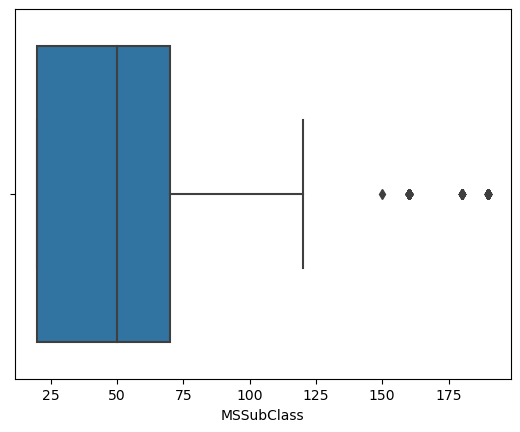

In [16]:
sns.boxplot(df.MSSubClass)

In [17]:
df['MSSubClass'].value_counts().sort_values(ascending=False)

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

###### 3.	MSZoning: The general zoning classification
Note : Model integer verilerle  daha çalıştığı için Model Sonrası Yeniden 2,3,şeklinde değiştirilebilir.

In [18]:
print('..........:',df['MSZoning'].value_counts())
print('..........:',df['MSZoning'].unique())
print('..........:',df['MSZoning'].mode())

..........: RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
..........: ['RH' 'RL' 'RM' 'FV' 'C (all)' nan]
..........: 0    RL
Name: MSZoning, dtype: object


<AxesSubplot:>

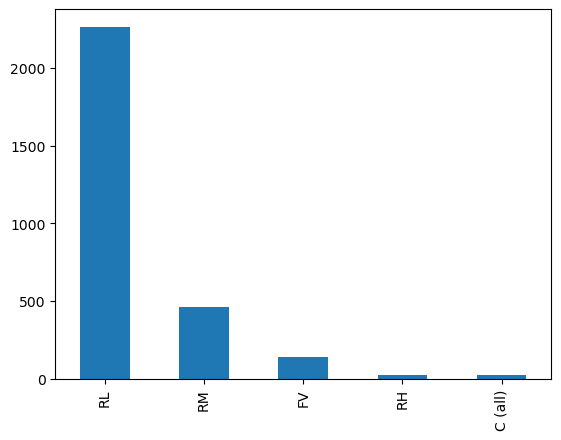

In [19]:
 df.MSZoning.value_counts().plot.bar()

In [20]:
df.MSZoning.fillna('RL',inplace=True) ## Mode Bilgisi RL old. için Na  kayıtların ı dolduruyoruz

###### 4.	LotFrontage: Linear feet of street connected to property

In [21]:
df['LotFrontage'].max(),df['LotFrontage'].mean()

(313.0, 69.30579531442663)

In [22]:
df['LotFrontage'].value_counts().sort_values(ascending=False)

60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
141.0      1
111.0      1
182.0      1
168.0      1
153.0      1
Name: LotFrontage, Length: 128, dtype: int64

<AxesSubplot:xlabel='LotFrontage'>

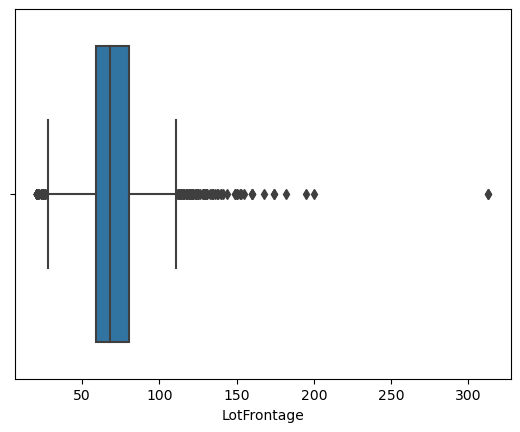

In [23]:
sns.boxplot(df.LotFrontage)

In [24]:
df.LotFrontage.fillna(df.LotFrontage.mean(),inplace=True)


In [25]:
##200 Üzerindekierlin Tamamını 200 Upd. Etmiş oluyoruz.
df["LotFrontage"] =np.where(df["LotFrontage"] > 200, 200, df["LotFrontage"])

<AxesSubplot:xlabel='LotFrontage'>

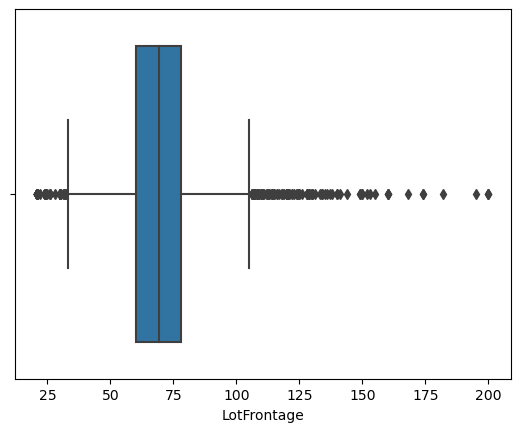

In [26]:
sns.boxplot(df.LotFrontage)

In [27]:
df.shape ##Kayıt Sayılarımızın Değişmediğinden Emin oluyoruz.

(2919, 81)

<AxesSubplot:xlabel='LotFrontage'>

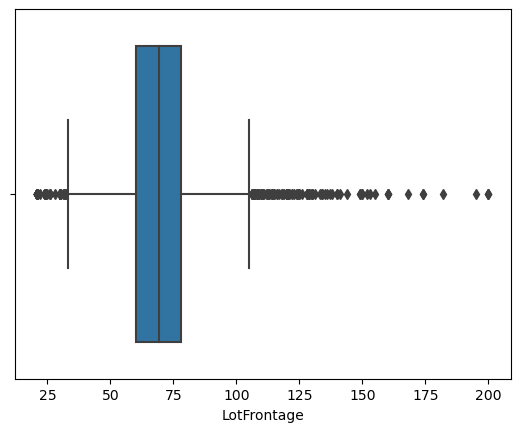

In [28]:
sns.boxplot(df.LotFrontage)

###### 5.	LotArea: Lot size in square feet

In [29]:
df['LotArea'].mean(),df['LotArea'].max(),df['LotArea'].isnull().sum()

(10168.11408016444, 215245, 0)

In [30]:
df['LotArea'].value_counts().sort_values(ascending=True) ##

14442     1
8516      1
9143      1
7311      1
7584      1
         ..
10800    25
9000     29
6000     34
7200     43
9600     44
Name: LotArea, Length: 1951, dtype: int64

<AxesSubplot:xlabel='LotArea'>

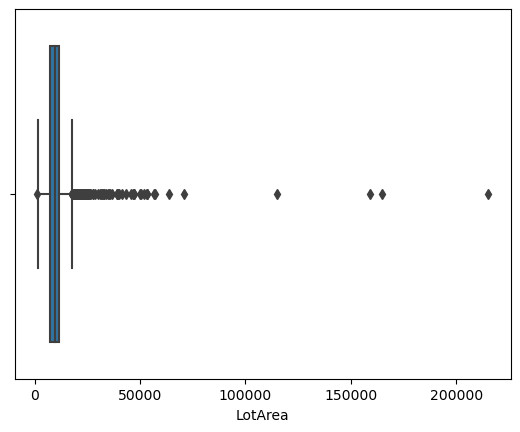

In [31]:
sns.boxplot(df.LotArea)

In [32]:
##17500 lü tek verilerin 17501 Olarak Replace Ediyoruz
df["LotArea"] =np.where(df["LotArea"] > 120000, 120000, df["LotArea"]) 

<AxesSubplot:xlabel='LotArea'>

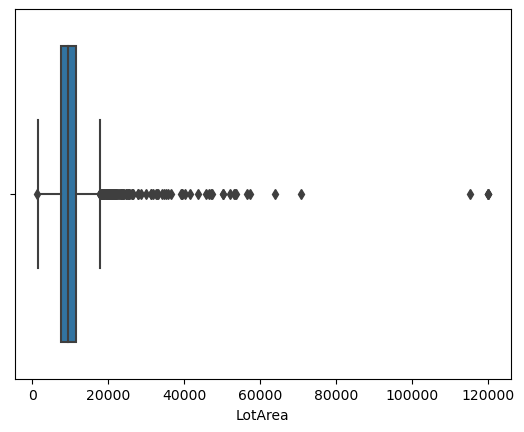

In [33]:
sns.boxplot(df.LotArea)

###### 6.	Street: Type of road access

In [34]:
df['Street'].mode(),df['Street'].isnull().sum()

(0    Pave
 Name: Street, dtype: object,
 0)

<AxesSubplot:>

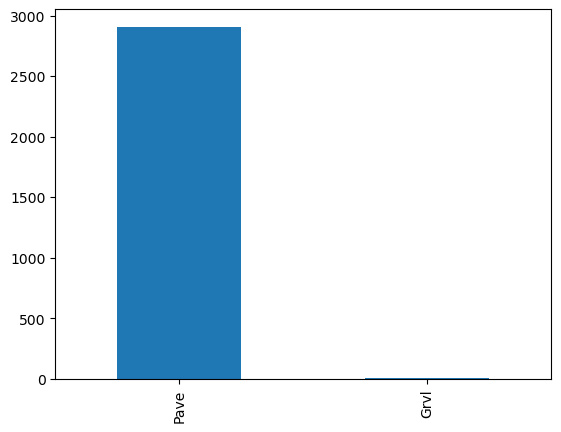

In [35]:
df.Street.value_counts().plot.bar()

###### 7.	Alley: Type of alley access

In [36]:
df['Alley'].value_counts(),df['Alley'].isnull().sum(),df['Alley'].unique(),df['Alley'].mode()

(Grvl    120
 Pave     78
 Name: Alley, dtype: int64,
 2721,
 array([nan, 'Pave', 'Grvl'], dtype=object),
 0    Grvl
 Name: Alley, dtype: object)

<AxesSubplot:>

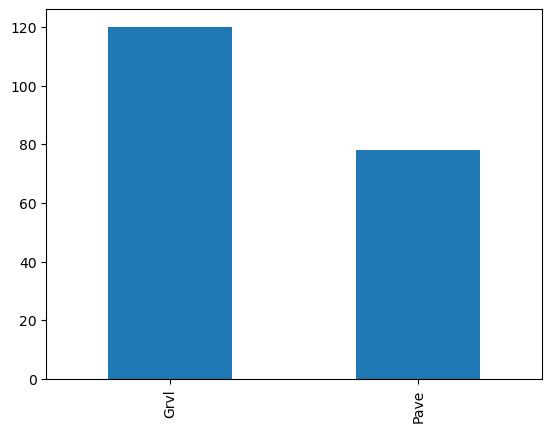

In [37]:
df.Alley.value_counts().plot.bar()

In [38]:
df['Alley'].fillna(df['Alley'].mode()[0], inplace=True) 

In [39]:
df['Alley'].unique()

array(['Grvl', 'Pave'], dtype=object)

###### 8.	LotShape: General shape of property

In [40]:
df['LotShape'].unique(),df['LotShape'].mode() ,df['LotShape'].value_counts()

(array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object),
 0    Reg
 Name: LotShape, dtype: object,
 Reg    1859
 IR1     968
 IR2      76
 IR3      16
 Name: LotShape, dtype: int64)

<AxesSubplot:>

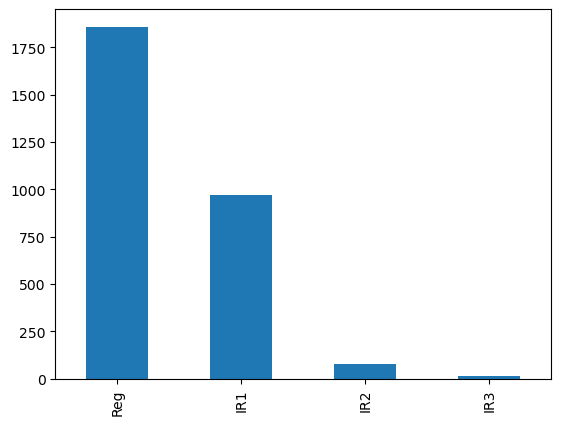

In [41]:
df.LotShape.value_counts().plot.bar()

###### 9.	LandContour: Flatness of the property

In [42]:
df['LandContour'].unique(),df['LandContour'].mode() ##

(array(['Lvl', 'HLS', 'Bnk', 'Low'], dtype=object),
 0    Lvl
 Name: LandContour, dtype: object)

<AxesSubplot:>

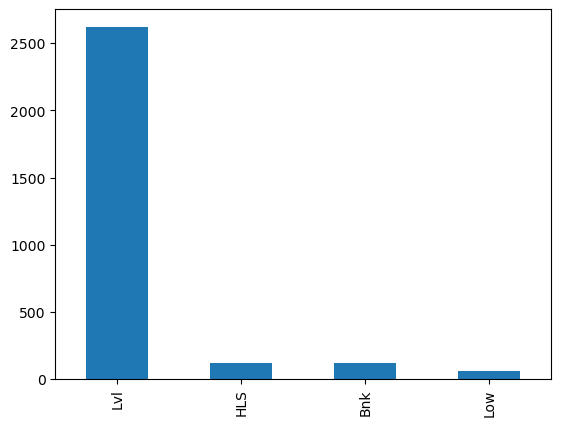

In [43]:
df.LandContour.value_counts().plot.bar()

###### 10.	Utilities: Type of utilities available

In [44]:
df['Utilities'].unique(),df['Utilities'].mode() ##

(array(['AllPub', nan, 'NoSeWa'], dtype=object),
 0    AllPub
 Name: Utilities, dtype: object)

In [45]:
df['Utilities'].fillna(df['Utilities'].mode()[0], inplace=True)

<AxesSubplot:>

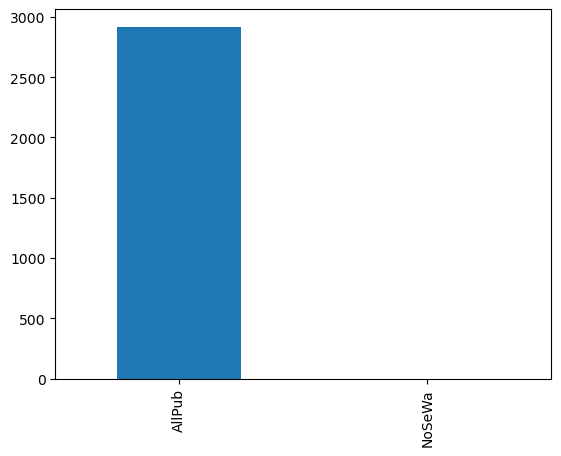

In [46]:
df.Utilities.value_counts().plot.bar()

###### 11.	LotConfig: Lot configuration

In [47]:
df['LotConfig'].unique(),df['LotConfig'].mode(),df['LotConfig'].isnull().sum()

(array(['Inside', 'Corner', 'FR2', 'CulDSac', 'FR3'], dtype=object),
 0    Inside
 Name: LotConfig, dtype: object,
 0)

<AxesSubplot:>

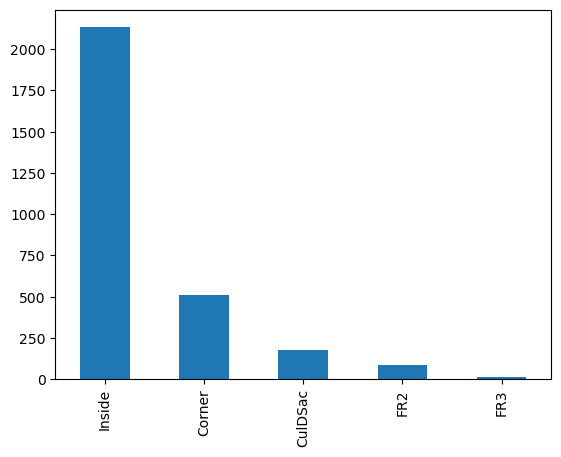

In [48]:
df.LotConfig.value_counts().plot.bar()

###### 12.	LandSlope: Slope of property

In [49]:
 df['LandSlope'].unique(),df['LandSlope'].mode(),df['LandSlope'].isnull().sum()

(array(['Gtl', 'Mod', 'Sev'], dtype=object),
 0    Gtl
 Name: LandSlope, dtype: object,
 0)

<AxesSubplot:>

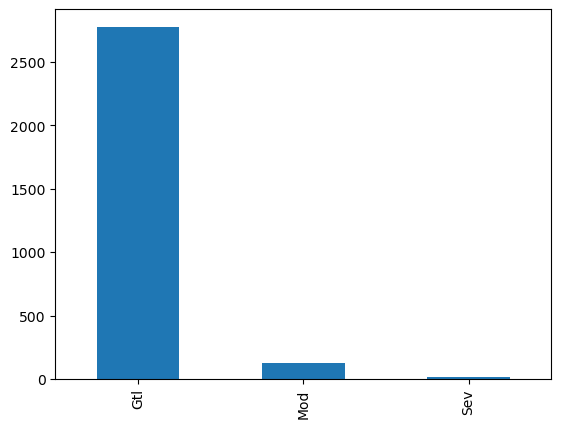

In [50]:
df.LandSlope.value_counts().plot.bar()

###### 13.	Neighborhood: Physical locations within Ames city limits

In [51]:
 df['Neighborhood'].unique(),df['Neighborhood'].mode(),df['Neighborhood'].isnull().sum()

(array(['NAmes', 'Gilbert', 'StoneBr', 'BrDale', 'NPkVill', 'NridgHt',
        'Blmngtn', 'NoRidge', 'Somerst', 'SawyerW', 'Sawyer', 'NWAmes',
        'OldTown', 'BrkSide', 'ClearCr', 'SWISU', 'Edwards', 'CollgCr',
        'Crawfor', 'Blueste', 'IDOTRR', 'Mitchel', 'Timber', 'MeadowV',
        'Veenker'], dtype=object),
 0    NAmes
 Name: Neighborhood, dtype: object,
 0)

<AxesSubplot:>

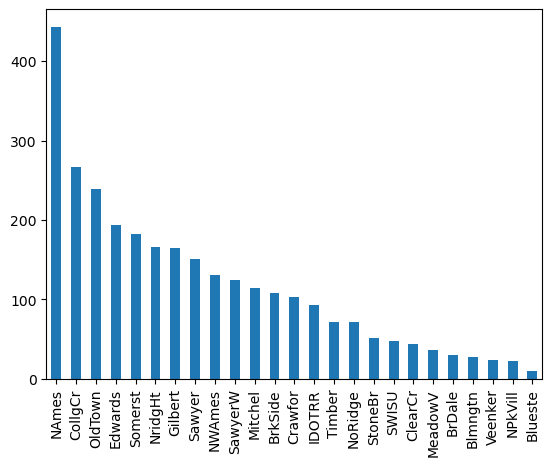

In [52]:
df.Neighborhood.value_counts().plot.bar()

###### 14.	Condition1: Proximity to main road or railroad

In [53]:
 df['Condition1'].unique(),df['Condition1'].mode(),df['Condition1'].isnull().sum()

(array(['Feedr', 'Norm', 'PosN', 'RRNe', 'Artery', 'RRNn', 'PosA', 'RRAn',
        'RRAe'], dtype=object),
 0    Norm
 Name: Condition1, dtype: object,
 0)

<AxesSubplot:>

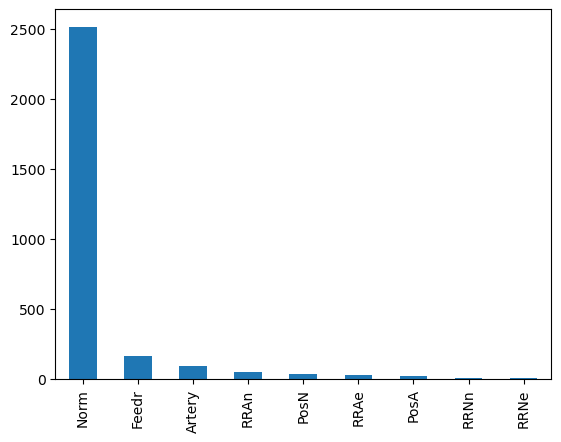

In [54]:
df.Condition1.value_counts().plot.bar()

###### 15.	Condition2: Proximity to main road or railroad (if a second is present)

In [55]:
 df['Condition2'].unique(),df['Condition2'].mode(),df['Condition2'].isnull().sum()

(array(['Norm', 'Feedr', 'PosA', 'PosN', 'Artery', 'RRNn', 'RRAn', 'RRAe'],
       dtype=object),
 0    Norm
 Name: Condition2, dtype: object,
 0)

<AxesSubplot:>

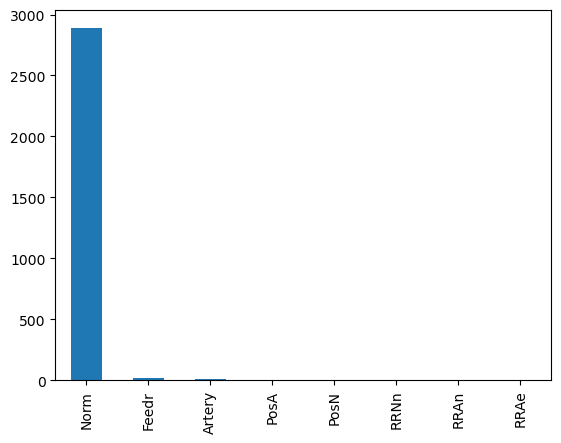

In [56]:
df.Condition2.value_counts().plot.bar()

###### 16.	BldgType: Type of dwelling

In [57]:
 df['BldgType'].unique(),df['BldgType'].mode(),df['BldgType'].isnull().sum() 

(array(['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon'], dtype=object),
 0    1Fam
 Name: BldgType, dtype: object,
 0)

<AxesSubplot:>

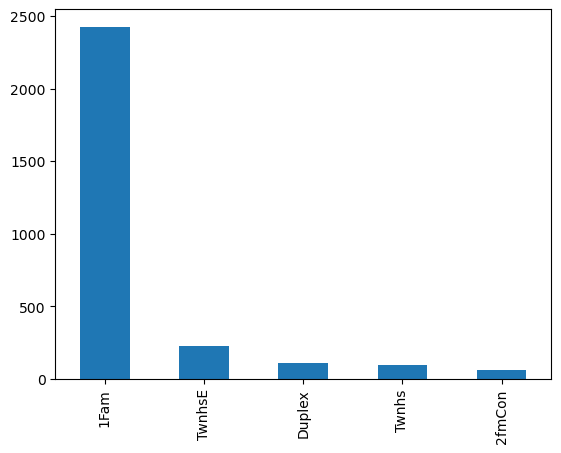

In [58]:
df.BldgType.value_counts().plot.bar()

###### 17.	HouseStyle: Style of dwelling

In [59]:
 df['HouseStyle'].unique(),df['HouseStyle'].mode(),df['HouseStyle'].isnull().sum()

(array(['1Story', '2Story', 'SLvl', '1.5Fin', 'SFoyer', '2.5Unf', '1.5Unf',
        '2.5Fin'], dtype=object),
 0    1Story
 Name: HouseStyle, dtype: object,
 0)

<AxesSubplot:>

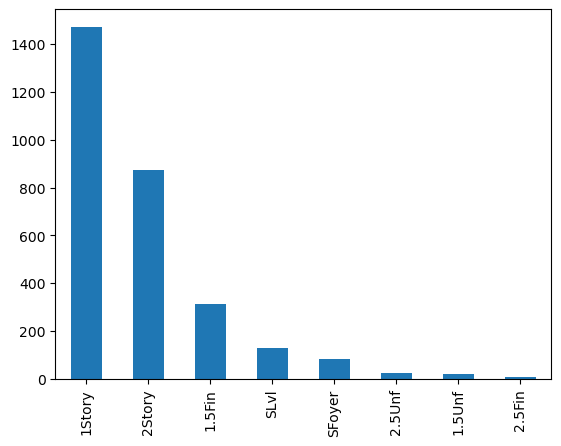

In [60]:
df.HouseStyle.value_counts().plot.bar()

###### 18.	OverallQual: Overall material and finish quality

In [61]:
 df['OverallQual'].unique(),df['OverallQual'].mode(),df['OverallQual'].isnull().sum()

(array([ 5,  6,  8,  7,  4,  9,  2,  3, 10,  1], dtype=int64),
 0    5
 Name: OverallQual, dtype: int64,
 0)

###### 19.	OverallCond: Overall condition rating

In [62]:
 df['OverallCond'].unique(),df['OverallCond'].mode(),df['OverallCond'].isnull().sum()

(array([6, 5, 7, 8, 2, 9, 3, 4, 1], dtype=int64),
 0    5
 Name: OverallCond, dtype: int64,
 0)

###### 20.	YearBuilt: Original construction date

In [63]:
 df['YearBuilt'].unique(),df['YearBuilt'].mean(),df['YearBuilt'].isnull().sum()

(array([1961, 1958, 1997, 1998, 1992, 1993, 1990, 1970, 1999, 1971, 1975,
        2009, 2005, 2003, 2002, 2006, 2004, 1920, 1974, 2000, 2010, 1967,
        1978, 1966, 1964, 1962, 1952, 1949, 1959, 1956, 1955, 1948, 1960,
        1963, 1900, 1957, 1938, 1923, 1890, 1910, 1922, 1950, 1925, 1939,
        1940, 1942, 1936, 1930, 1915, 1912, 1917, 1907, 1968, 1977, 1927,
        1947, 1954, 1987, 1996, 1972, 1945, 1924, 1931, 1941, 1994, 1989,
        1921, 1896, 1976, 2008, 1965, 1973, 1984, 1985, 1991, 1969, 1995,
        1980, 2007, 1986, 1981, 1951, 1953, 1935, 1902, 1946, 1934, 1983,
        1880, 1979, 2001, 1916, 1918, 1988, 1937, 1905, 1928, 1926, 1929,
        1914, 1895, 1982, 1879, 1901, 1919, 1932, 1885, 1908, 1892, 1913,
        1893, 1906, 1898, 1904, 1882, 1875, 1911, 1872], dtype=int64),
 1971.3127783487496,
 0)

In [64]:
##Modelimiz için Daha iyi öğrenebilmesi için Sayısal değerler çeviriyoruz. 
df['YearBuilt']=2023-df['YearBuilt']

In [65]:
##140 üzerinde yaşı olanları 140 Yaslıyoruz
df["YearBuilt"] =np.where(df["YearBuilt"] > 140, 140, df["YearBuilt"])

In [66]:
 df['YearBuilt'].unique(),df['YearBuilt'].mean(),df['YearBuilt'].isnull().sum()

(array([ 62,  65,  26,  25,  31,  30,  33,  53,  24,  52,  48,  14,  18,
         20,  21,  17,  19, 103,  49,  23,  13,  56,  45,  57,  59,  61,
         71,  74,  64,  67,  68,  75,  63,  60, 123,  66,  85, 100, 133,
        113, 101,  73,  98,  84,  83,  81,  87,  93, 108, 111, 106, 116,
         55,  46,  96,  76,  69,  36,  27,  51,  78,  99,  92,  82,  29,
         34, 102, 127,  47,  15,  58,  50,  39,  38,  32,  54,  28,  43,
         16,  37,  42,  72,  70,  88, 121,  77,  89,  40, 140,  44,  22,
        107, 105,  35,  86, 118,  95,  97,  94, 109, 128,  41, 122, 104,
         91, 138, 115, 131, 110, 130, 117, 125, 119, 112], dtype=int64),
 51.673860911270985,
 0)

<AxesSubplot:xlabel='YearBuilt'>

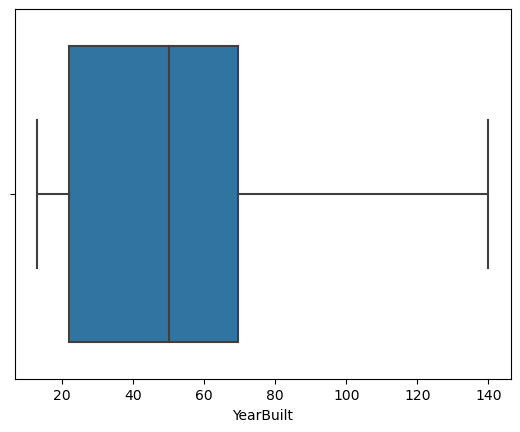

In [67]:
sns.boxplot(df.YearBuilt)

###### 21.	YearRemodAdd: Remodel date

In [68]:
 df['YearRemodAdd'].unique(),df['YearRemodAdd'].mean(),df['YearRemodAdd'].isnull().sum()

(array([1961, 1958, 1998, 1992, 1994, 2007, 1990, 1970, 1999, 1971, 1975,
        2010, 2005, 2006, 2004, 2002, 1950, 1993, 2000, 2003, 1967, 1978,
        1966, 1964, 2001, 2008, 2009, 1959, 1956, 1952, 1955, 1960, 1984,
        1954, 1957, 1962, 1997, 1980, 1968, 1987, 1979, 1996, 1972, 1985,
        1991, 1989, 1977, 1976, 1973, 1986, 1969, 1995, 1974, 1981, 1965,
        1951, 1953, 1963, 1982, 1988, 1983], dtype=int64),
 1984.2644741349777,
 0)

In [69]:
##Modelimiz için Daha iyi öğrenebilmesi için Sayısal değerler çeviriyoruz. 
df['YearRemodAdd']=2023-df['YearRemodAdd']

<AxesSubplot:xlabel='YearRemodAdd'>

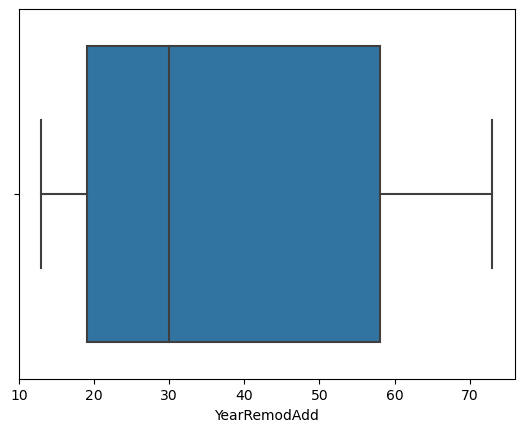

In [70]:
sns.boxplot(df.YearRemodAdd)

###### 22.	RoofStyle: Type of roof 

In [71]:
 df['RoofStyle'].unique(),df['RoofStyle'].mode(),df['RoofStyle'].isnull().sum()

(array(['Gable', 'Hip', 'Gambrel', 'Flat', 'Mansard', 'Shed'], dtype=object),
 0    Gable
 Name: RoofStyle, dtype: object,
 0)

<AxesSubplot:>

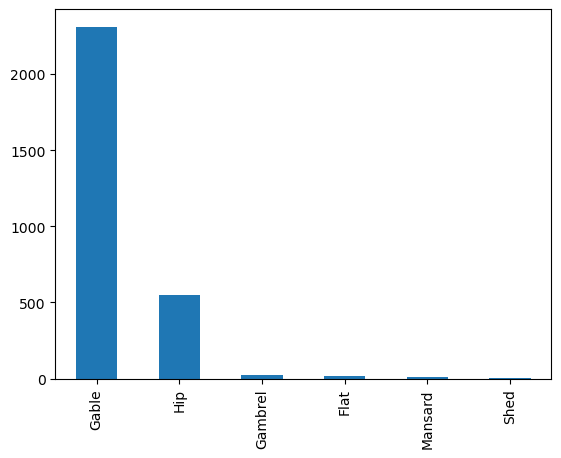

In [72]:
df.RoofStyle.value_counts().plot.bar()

###### 23.	RoofMatl: Roof material

In [73]:
df['RoofMatl'].unique(),df['RoofMatl'].mode(),df['RoofMatl'].isnull().sum()

(array(['CompShg', 'Tar&Grv', 'WdShake', 'WdShngl', 'Metal', 'Membran',
        'Roll', 'ClyTile'], dtype=object),
 0    CompShg
 Name: RoofMatl, dtype: object,
 0)

<AxesSubplot:>

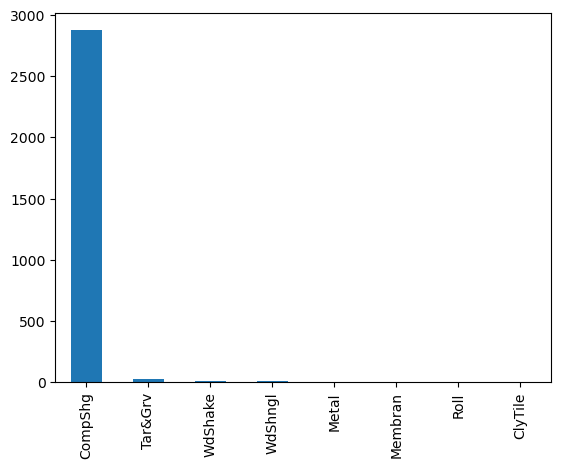

In [74]:
df.RoofMatl.value_counts().plot.bar()

###### 24.	Exterior1st: Exterior covering on house

In [75]:
print('Unique List..................................:',df['Exterior1st'].unique())
print('Mode List....................................:',df['Exterior1st'].mode())
print('NullCount List...............................:',df['Exterior1st'].isnull().sum())

Unique List..................................: ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' nan 'CBlock' 'Stone'
 'ImStucc']
Mode List....................................: 0    VinylSd
Name: Exterior1st, dtype: object
NullCount List...............................: 1


In [76]:
df['Exterior1st'].fillna(df['Exterior1st'].mode()[0], inplace=True)

In [77]:
print('Unique List..................................:',df['Exterior1st'].unique())
print('Mode List....................................:',df['Exterior1st'].mode())
print('NullCount List...............................:',df['Exterior1st'].isnull().sum())

Unique List..................................: ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' 'CBlock' 'Stone'
 'ImStucc']
Mode List....................................: 0    VinylSd
Name: Exterior1st, dtype: object
NullCount List...............................: 0


<AxesSubplot:>

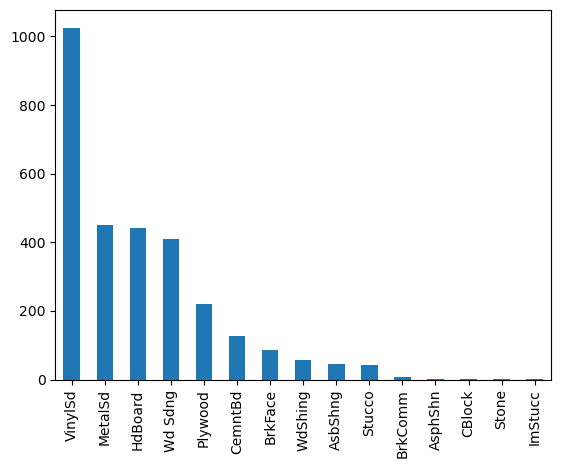

In [78]:
df.Exterior1st.value_counts().plot.bar()

###### 25.	Exterior2nd: Exterior covering on house (if more than one material)

In [79]:
print('Unique List..................................:',df['Exterior2nd'].unique())
print('Mode List....................................:',df['Exterior2nd'].mode())
print('NullCount List...............................:',df['Exterior2nd'].isnull().sum())

Unique List..................................: ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'Brk Cmn' 'CmentBd'
 'ImStucc' 'Wd Shng' 'AsbShng' 'Stucco' 'CBlock' 'BrkFace' 'AsphShn' nan
 'Stone' 'Other']
Mode List....................................: 0    VinylSd
Name: Exterior2nd, dtype: object
NullCount List...............................: 1


In [80]:
df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0], inplace=True)

<AxesSubplot:>

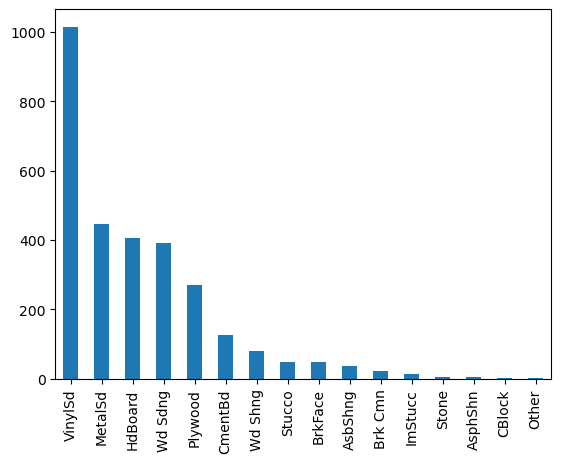

In [81]:
df.Exterior2nd.value_counts().plot.bar()

###### 26.	MasVnrType: Masonry veneer type

In [82]:
print('Unique List..................................:',df['MasVnrType'].unique())
print('Mode List....................................:',df['MasVnrType'].mode())
print('NullCount List...............................:',df['MasVnrType'].isnull().sum())

Unique List..................................: ['None' 'BrkFace' 'Stone' 'BrkCmn' nan]
Mode List....................................: 0    None
Name: MasVnrType, dtype: object
NullCount List...............................: 24


In [83]:
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)

<AxesSubplot:>

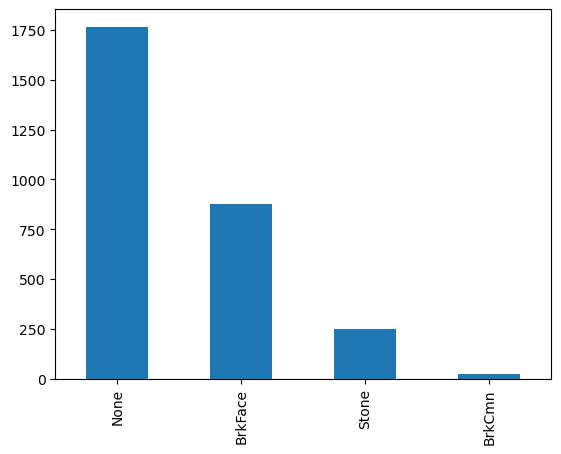

In [84]:
df.MasVnrType.value_counts().plot.bar()

###### 27.	MasVnrArea: Masonry veneer area in square feet

In [85]:
print('Mode List....................................:',df['MasVnrArea'].mean())
print('NullCount List...............................:',df['MasVnrArea'].isnull().sum())

Mode List....................................: 102.20131215469613
NullCount List...............................: 23


In [86]:
df.MasVnrArea.fillna(df.MasVnrArea.mean(),inplace=True)

In [87]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave  Grvl      Reg   
1  1462          20       RL         81.0    14267   Pave  Grvl      IR1   
2  1463          60       RL         74.0    13830   Pave  Grvl      IR1   
3  1464          60       RL         78.0     9978   Pave  Grvl      IR1   
4  1465         120       RL         43.0     5005   Pave  Grvl      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6         62   
1       Norm     1Fam     1Story            6            6         65   
2       Norm     1Fam     2Story            5            5         26   
3       Norm     1Fam     2Story            6            6         25   
4       Norm   TwnhsE     1Story            8            5         31   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            62     Gable  CompShg     VinylSd     VinylSd       None   
1            65       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2            25     Gable  CompShg     VinylSd     VinylSd       None   
3            25     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4            31     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [88]:
df.MasVnrArea.value_counts()

0.000000      1738
102.201312      23
120.000000      15
200.000000      13
176.000000      13
              ... 
118.000000       1
692.000000       1
332.000000       1
522.000000       1
438.000000       1
Name: MasVnrArea, Length: 445, dtype: int64

<AxesSubplot:xlabel='MasVnrArea'>

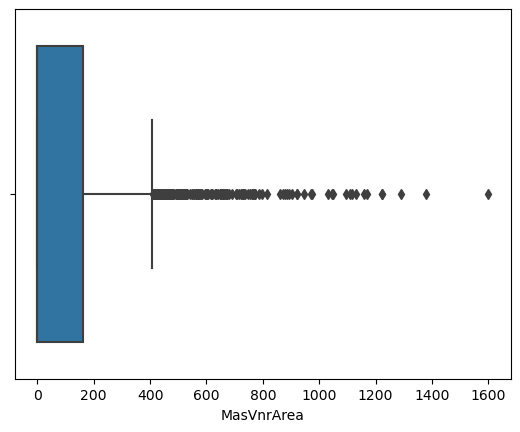

In [89]:
sns.boxplot(df.MasVnrArea)

In [90]:
##1000 üzerinde ki outlierları 400 e yasladık.
df["MasVnrArea"] =np.where(df["MasVnrArea"] > 400, 400, df["MasVnrArea"])

<AxesSubplot:xlabel='MasVnrArea'>

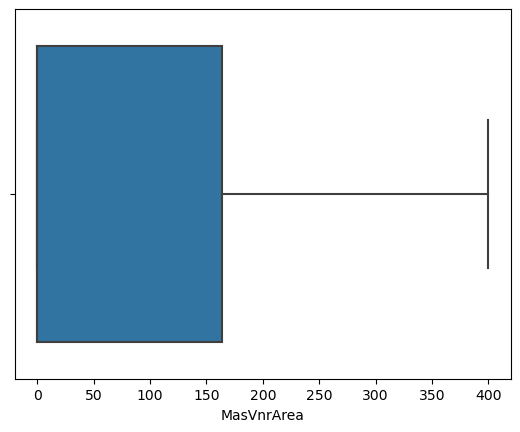

In [91]:
sns.boxplot(df.MasVnrArea)

###### 28.	ExterQual: Exterior material quality

In [92]:
print('Unique List..................................:',df['ExterQual'].unique())
print('Mode List....................................:',df['ExterQual'].mode())
print('NullCount List...............................:',df['ExterQual'].isnull().sum())

Unique List..................................: ['TA' 'Gd' 'Ex' 'Fa']
Mode List....................................: 0    TA
Name: ExterQual, dtype: object
NullCount List...............................: 0


<AxesSubplot:>

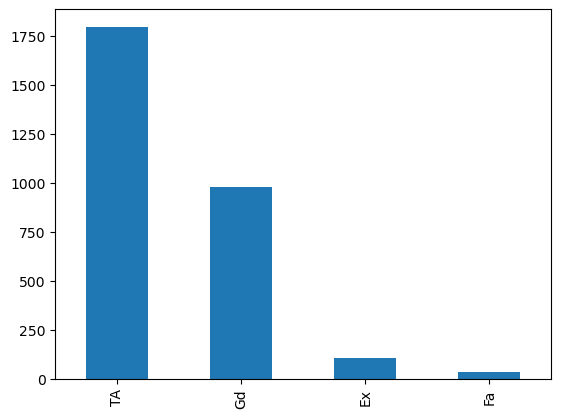

In [93]:
df.ExterQual.value_counts().plot.bar()

###### 29.	ExterCond: Present condition of the material on the exterior

In [94]:
print('Unique List..................................:',df['ExterCond'].unique())
print('Mode List....................................:',df['ExterCond'].mode())
print('NullCount List...............................:',df['ExterCond'].isnull().sum())

Unique List..................................: ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Mode List....................................: 0    TA
Name: ExterCond, dtype: object
NullCount List...............................: 0


<AxesSubplot:>

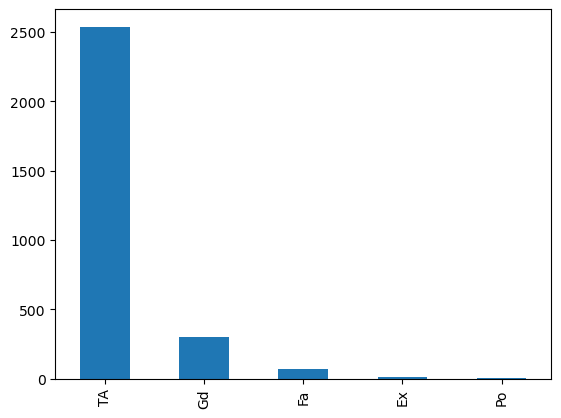

In [95]:
df.ExterCond.value_counts().plot.bar()

######    30.	Foundation: Type of foundation

In [96]:
print('Unique List..................................:',df['Foundation'].unique())
print('Mode List....................................:',df['Foundation'].mode())
print('NullCount List...............................:',df['Foundation'].isnull().sum())

Unique List..................................: ['CBlock' 'PConc' 'BrkTil' 'Stone' 'Slab' 'Wood']
Mode List....................................: 0    PConc
Name: Foundation, dtype: object
NullCount List...............................: 0


<AxesSubplot:>

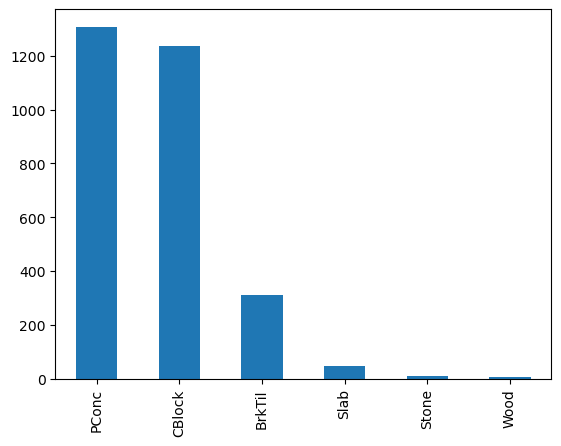

In [97]:
df.Foundation.value_counts().plot.bar()

Data Type String
Foundation Unique List..................................: ['CBlock' 'PConc' 'BrkTil' 'Stone' 'Slab' 'Wood']
Foundation Mode List....................................: 0    PConc
Name: Foundation, dtype: object
Foundation NullCount List...............................: 0


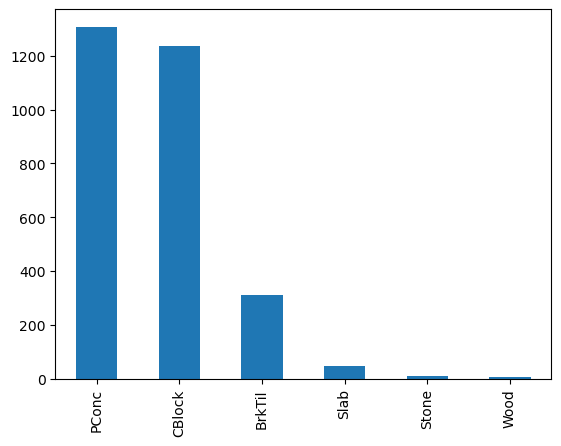

In [98]:
fnc_Column_Analysis('Foundation')

###### 31.	BsmtQual: Height of the basement

Data Type String
BsmtQual Unique List..................................: ['TA' 'Gd' 'Ex' 'Fa' nan]
BsmtQual Mode List....................................: 0    TA
Name: BsmtQual, dtype: object
BsmtQual NullCount List...............................: 81
Na Dönüşümü Yapıldı


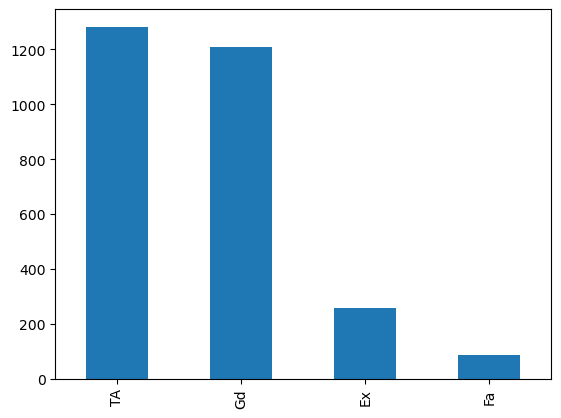

In [99]:
fnc_Column_Analysis('BsmtQual')

In [100]:
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace=True)

Data Type String
BsmtQual Unique List..................................: ['TA' 'Gd' 'Ex' 'Fa']
BsmtQual Mode List....................................: 0    TA
Name: BsmtQual, dtype: object
BsmtQual NullCount List...............................: 0


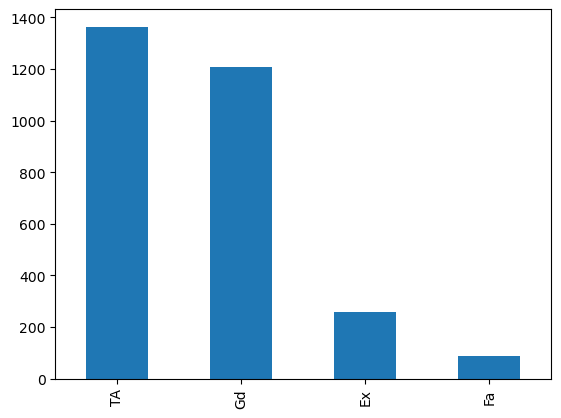

In [101]:
fnc_Column_Analysis('BsmtQual')

<AxesSubplot:>

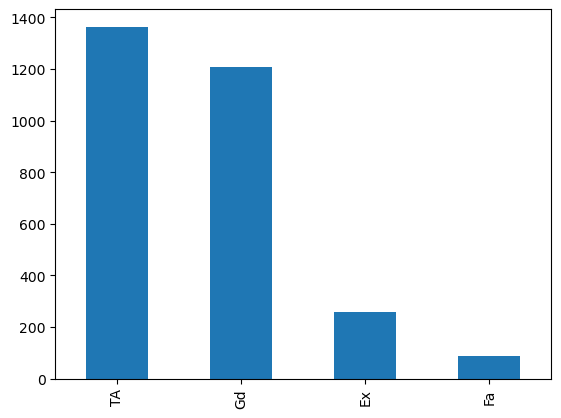

In [102]:
df.BsmtQual.value_counts().plot.bar()

###### 32.	BsmtCond: General condition of the basement

Data Type String
BsmtCond Unique List..................................: ['TA' 'Po' 'Fa' 'Gd' nan]
BsmtCond Mode List....................................: 0    TA
Name: BsmtCond, dtype: object
BsmtCond NullCount List...............................: 82
Na Dönüşümü Yapıldı


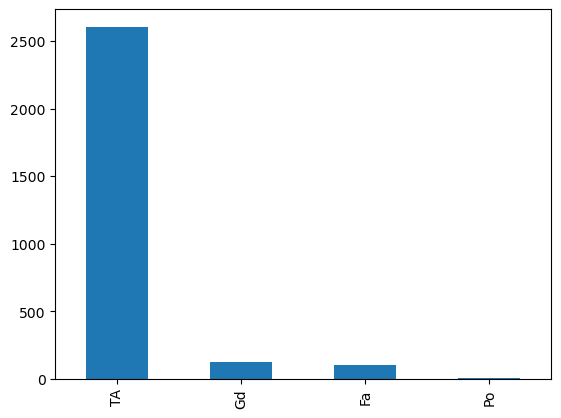

In [103]:
fnc_Column_Analysis('BsmtCond')

In [104]:
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace=True)

Data Type String
BsmtCond Unique List..................................: ['TA' 'Po' 'Fa' 'Gd']
BsmtCond Mode List....................................: 0    TA
Name: BsmtCond, dtype: object
BsmtCond NullCount List...............................: 0


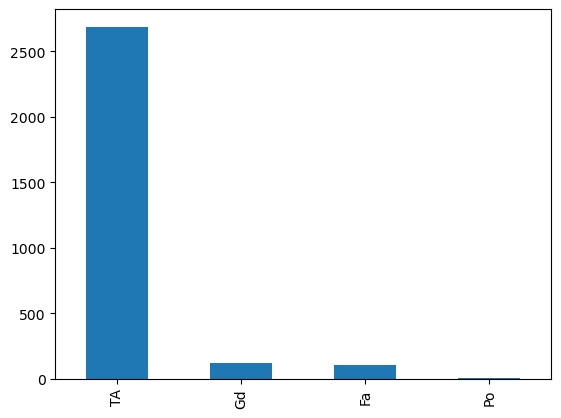

In [105]:
fnc_Column_Analysis('BsmtCond')

<AxesSubplot:>

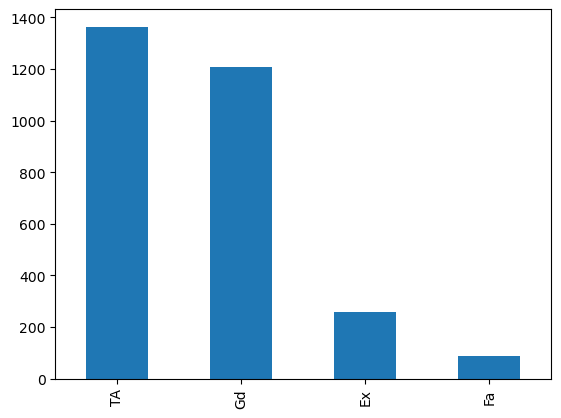

In [106]:
df.BsmtQual.value_counts().plot.bar()

###### 33.	BsmtExposure: Walkout or garden level basement walls

Data Type String
BsmtExposure Unique List..................................: ['No' 'Gd' 'Mn' 'Av' nan]
BsmtExposure Mode List....................................: 0    No
Name: BsmtExposure, dtype: object
BsmtExposure NullCount List...............................: 82
Na Dönüşümü Yapıldı


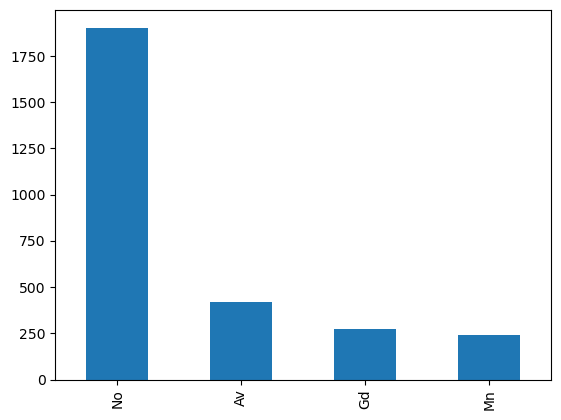

In [107]:
fnc_Column_Analysis('BsmtExposure')

In [108]:
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace=True)

<AxesSubplot:>

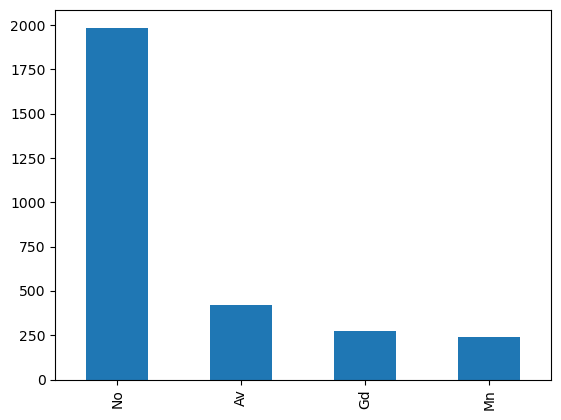

In [109]:
df.BsmtExposure.value_counts().plot.bar()

###### 34.	BsmtFinType1: Quality of basement finished area

Data Type String
BsmtFinType1 Unique List..................................: ['Rec' 'ALQ' 'GLQ' 'Unf' 'BLQ' 'LwQ' nan]
BsmtFinType1 Mode List....................................: 0    Unf
Name: BsmtFinType1, dtype: object
BsmtFinType1 NullCount List...............................: 79
Na Dönüşümü Yapıldı


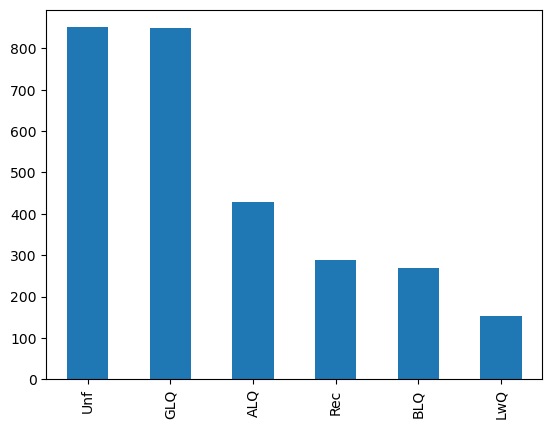

In [110]:
fnc_Column_Analysis('BsmtFinType1')

In [111]:
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace=True)

<AxesSubplot:>

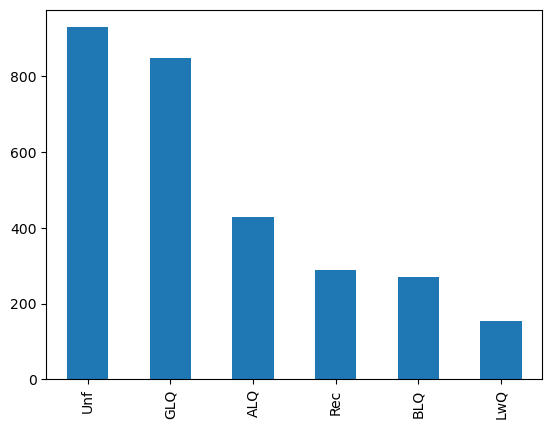

In [112]:
df.BsmtFinType1.value_counts().plot.bar()

###### 35.	BsmtFinSF1: Type 1 finished square feet

Data Type integer
BsmtFinSF1 Mode List....................................: 0    0.0
Name: BsmtFinSF1, dtype: float64
BsmtFinSF1 NullCount List...............................: 1
Na Dönüşümü Yapıldı


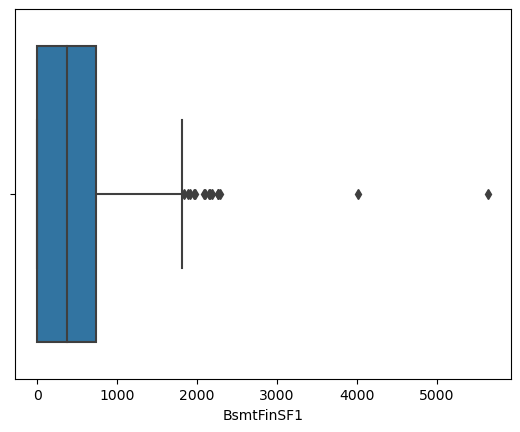

In [113]:
fnc_Column_Analysis('BsmtFinSF1')

In [114]:
df.BsmtFinSF1.fillna(df.BsmtFinSF1.mean(),inplace=True)

Data Type integer
BsmtFinSF1 Mode List....................................: 0    0.0
Name: BsmtFinSF1, dtype: float64
BsmtFinSF1 NullCount List...............................: 0


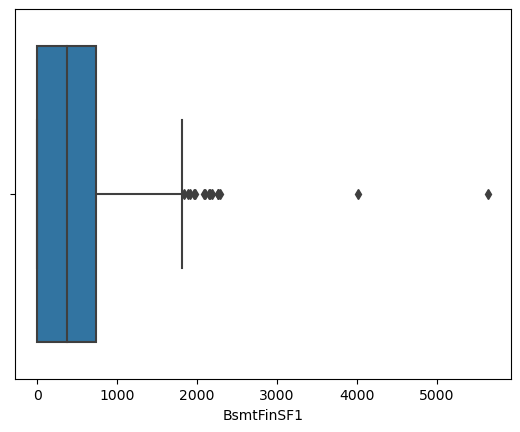

In [115]:
fnc_Column_Analysis('BsmtFinSF1')

<AxesSubplot:xlabel='BsmtFinSF1'>

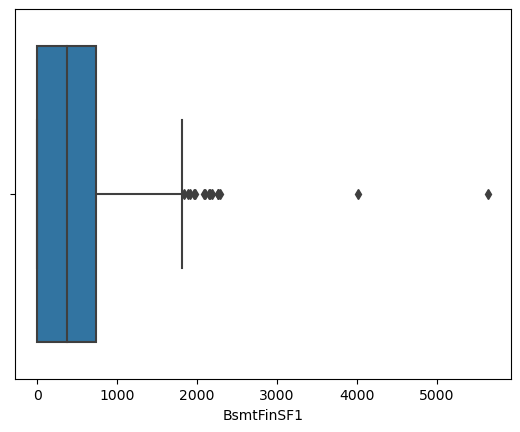

In [116]:
sns.boxplot(df.BsmtFinSF1)

In [117]:
##1700 üzerindeki düzensiz verileri MAx bir  değere sabitliyoruz.
df["BsmtFinSF1"] =np.where(df["BsmtFinSF1"] > 1700, 1700, df["BsmtFinSF1"])

<AxesSubplot:xlabel='BsmtFinSF1'>

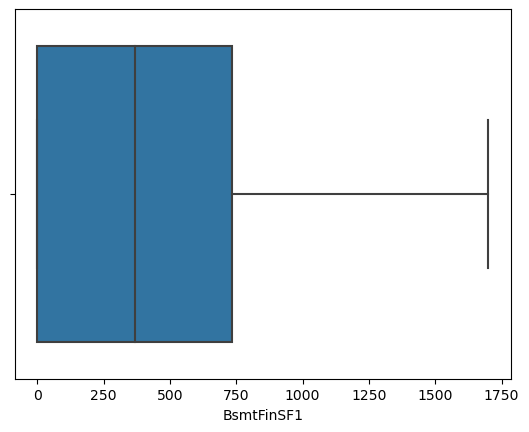

In [118]:
sns.boxplot(df.BsmtFinSF1)

###### 36.	BsmtFinType2: Quality of second finished area (if present)

Data Type String
BsmtFinType2 Unique List..................................: ['LwQ' 'Unf' 'Rec' 'BLQ' 'GLQ' 'ALQ' nan]
BsmtFinType2 Mode List....................................: 0    Unf
Name: BsmtFinType2, dtype: object
BsmtFinType2 NullCount List...............................: 80
Na Dönüşümü Yapıldı


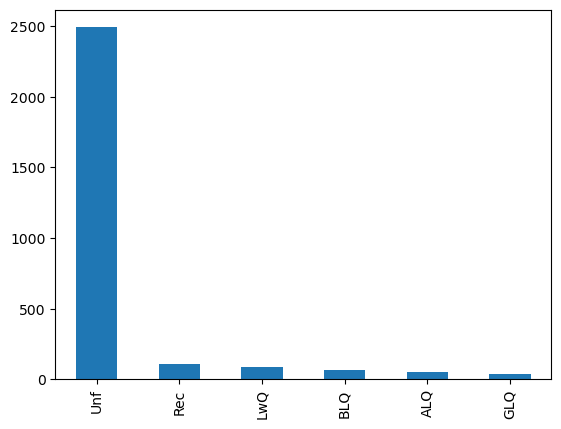

In [119]:
fnc_Column_Analysis('BsmtFinType2')

<AxesSubplot:>

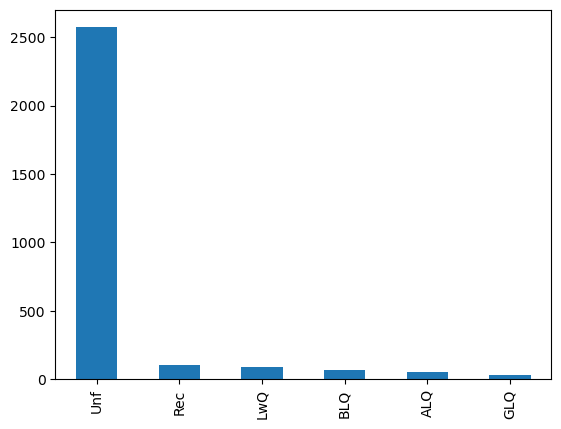

In [120]:
df.BsmtFinType2.value_counts().plot.bar()

In [121]:
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace=True)

Data Type String
BsmtFinType2 Unique List..................................: ['LwQ' 'Unf' 'Rec' 'BLQ' 'GLQ' 'ALQ']
BsmtFinType2 Mode List....................................: 0    Unf
Name: BsmtFinType2, dtype: object
BsmtFinType2 NullCount List...............................: 0


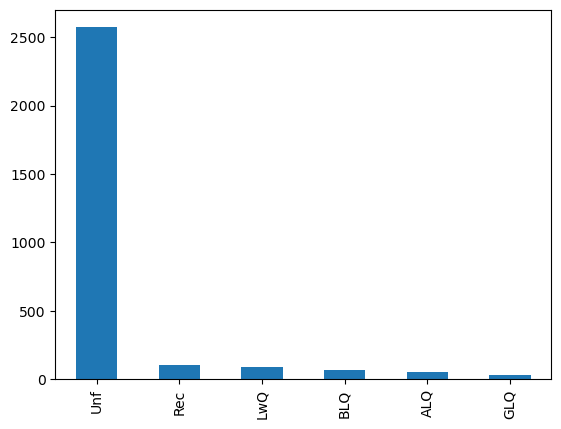

In [122]:
fnc_Column_Analysis('BsmtFinType2')

###### 37.	BsmtFinSF2: Type 2 finished square feet

Data Type integer
BsmtFinSF2 Mode List....................................: 0    0.0
Name: BsmtFinSF2, dtype: float64
BsmtFinSF2 NullCount List...............................: 1
Na Dönüşümü Yapıldı


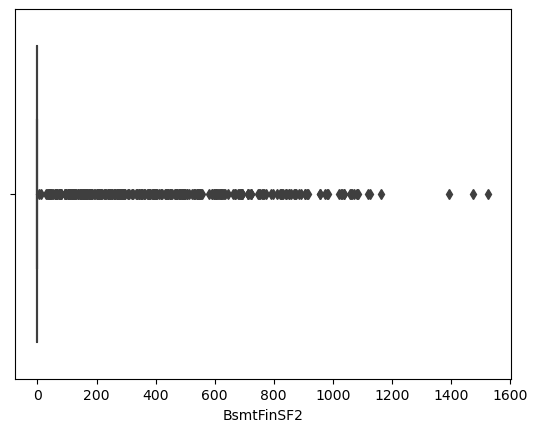

In [123]:
fnc_Column_Analysis('BsmtFinSF2')

In [124]:
df.BsmtFinSF2.fillna(df.BsmtFinSF2.mean(),inplace=True)

<AxesSubplot:xlabel='BsmtFinSF2'>

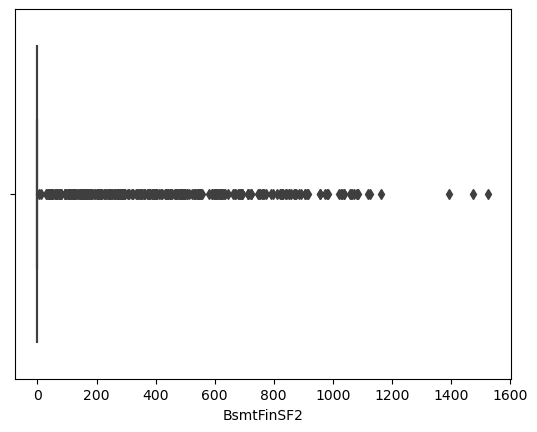

In [125]:
sns.boxplot(df.BsmtFinSF2)

In [126]:
df["BsmtFinSF2"] =np.where(df["BsmtFinSF2"] > 1200, 1200, df["BsmtFinSF2"])

<AxesSubplot:xlabel='BsmtFinSF2'>

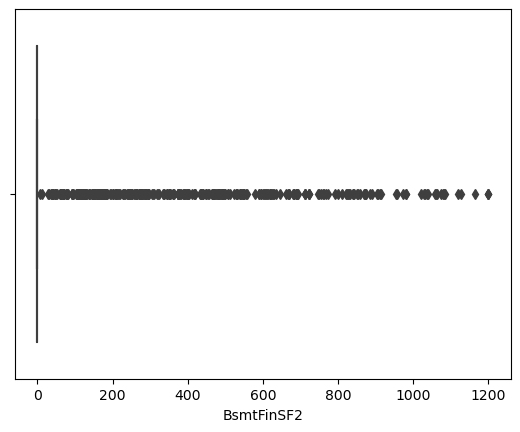

In [127]:
sns.boxplot(df.BsmtFinSF2)

###### 38.	BsmtUnfSF: Unfinished square feet of basement area

Data Type integer
BsmtUnfSF Mode List....................................: 0    0.0
Name: BsmtUnfSF, dtype: float64
BsmtUnfSF NullCount List...............................: 1
Na Dönüşümü Yapıldı


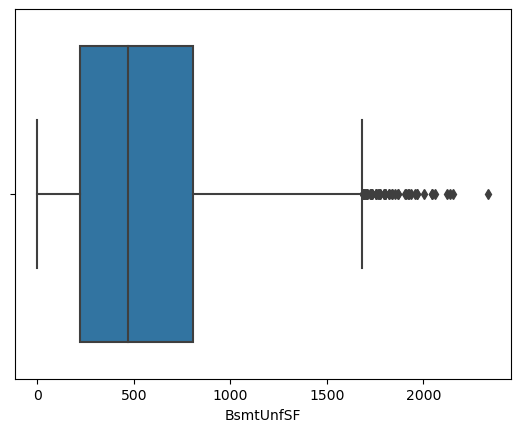

In [128]:
fnc_Column_Analysis('BsmtUnfSF')


In [129]:
df.BsmtUnfSF.fillna(df.BsmtUnfSF.mean(),inplace=True)

<AxesSubplot:xlabel='BsmtUnfSF'>

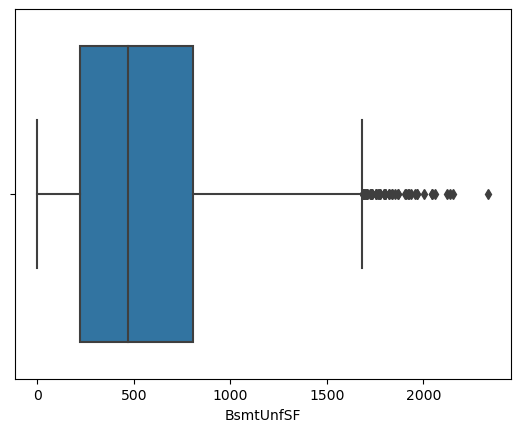

In [130]:
sns.boxplot(df.BsmtUnfSF)

In [131]:
df["BsmtUnfSF"] =np.where(df["BsmtUnfSF"] > 1600, 1600, df["BsmtUnfSF"])

<AxesSubplot:xlabel='BsmtUnfSF'>

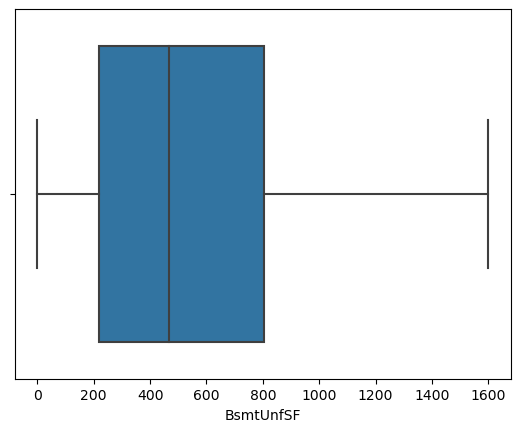

In [132]:
sns.boxplot(df.BsmtUnfSF)

###### 39.	TotalBsmtSF: Total square feet of basement area

Data Type integer
TotalBsmtSF Mode List....................................: 0    0.0
Name: TotalBsmtSF, dtype: float64
TotalBsmtSF NullCount List...............................: 1
Na Dönüşümü Yapıldı


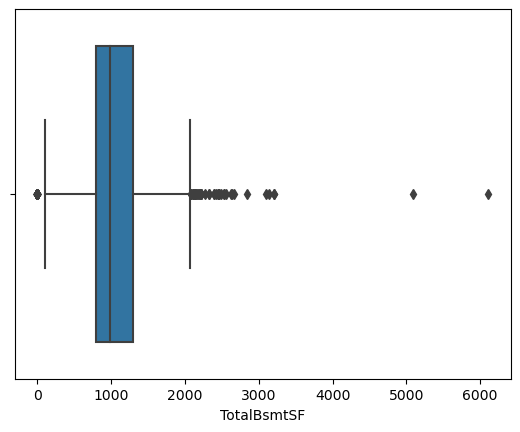

In [133]:
fnc_Column_Analysis('TotalBsmtSF')

In [134]:
df.TotalBsmtSF.fillna(df.TotalBsmtSF.mean(),inplace=True)

<AxesSubplot:xlabel='TotalBsmtSF'>

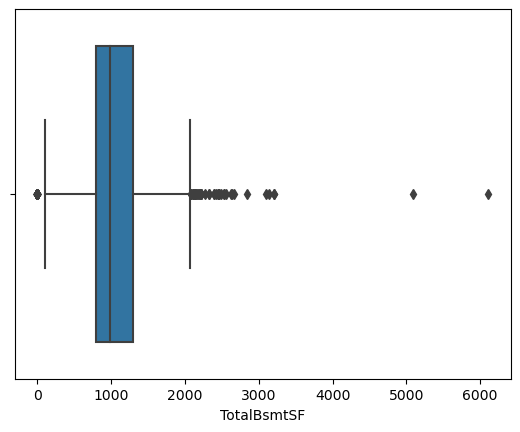

In [135]:
sns.boxplot(df.TotalBsmtSF)

In [136]:
## 2000 üzerindekier 2000 , 0 altındakileri 100 yaslamış oluyoruz düzensiz verileri önüne geçmiş olıyuroz
df["TotalBsmtSF"] =np.where(df["TotalBsmtSF"] > 2000, 2000, df["TotalBsmtSF"])
df["TotalBsmtSF"] =np.where(df["TotalBsmtSF"] <=0, 100, df["TotalBsmtSF"])

<AxesSubplot:xlabel='TotalBsmtSF'>

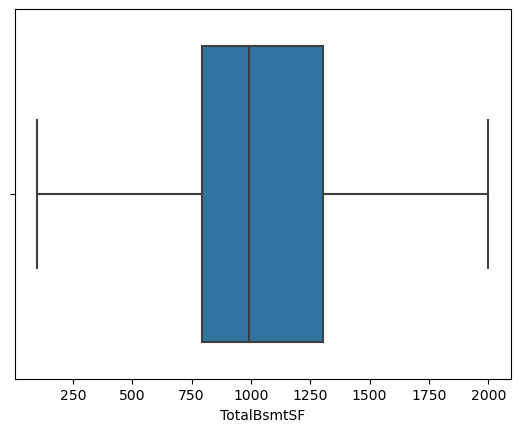

In [137]:
sns.boxplot(df.TotalBsmtSF)

###### 40.	Heating: Type of heating

Data Type String
Heating Unique List..................................: ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
Heating Mode List....................................: 0    GasA
Name: Heating, dtype: object
Heating NullCount List...............................: 0


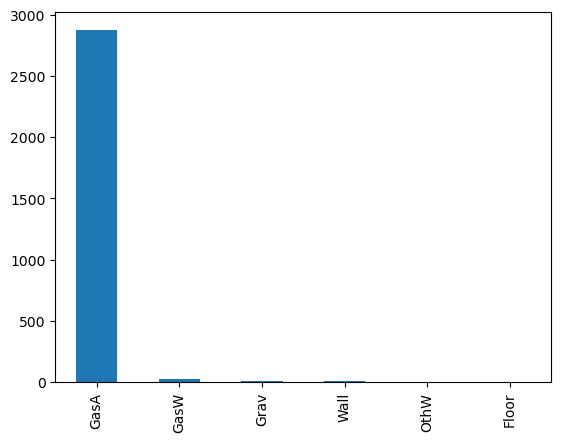

In [138]:
fnc_Column_Analysis('Heating')

<AxesSubplot:>

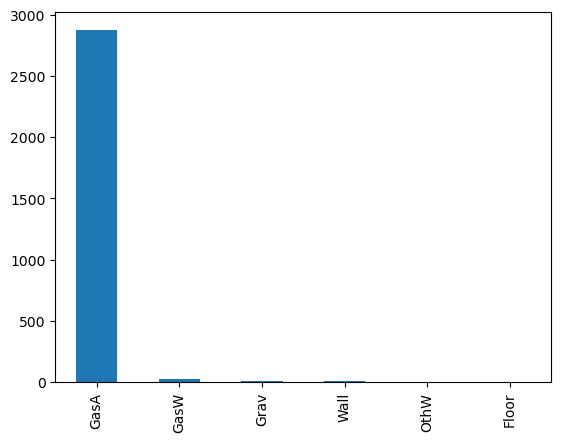

In [139]:
df.Heating.value_counts().plot.bar()

###### 41.	HeatingQC: Heating quality and condition

Data Type String
HeatingQC Unique List..................................: ['TA' 'Gd' 'Ex' 'Fa' 'Po']
HeatingQC Mode List....................................: 0    Ex
Name: HeatingQC, dtype: object
HeatingQC NullCount List...............................: 0


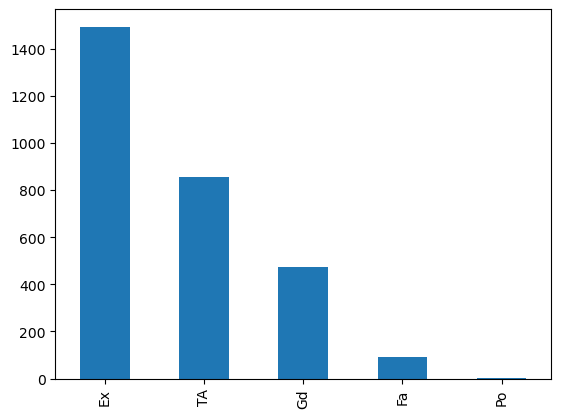

In [140]:
fnc_Column_Analysis('HeatingQC')

###### 42.	CentralAir: Central air conditioning

Data Type String
CentralAir Unique List..................................: ['Y' 'N']
CentralAir Mode List....................................: 0    Y
Name: CentralAir, dtype: object
CentralAir NullCount List...............................: 0


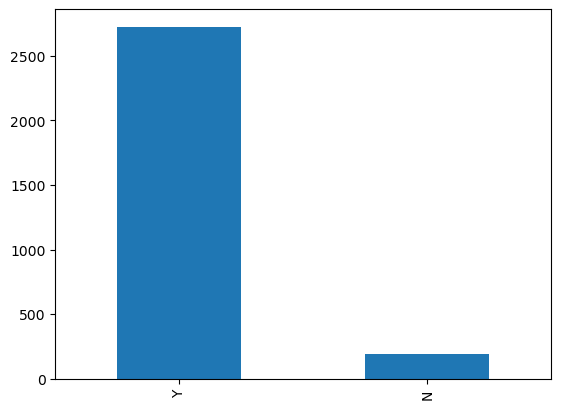

In [141]:
fnc_Column_Analysis('CentralAir')

###### 43.	Electrical: Electrical system

Data Type String
Electrical Unique List..................................: ['SBrkr' 'FuseA' 'FuseF' 'FuseP' 'Mix' nan]
Electrical Mode List....................................: 0    SBrkr
Name: Electrical, dtype: object
Electrical NullCount List...............................: 1
Na Dönüşümü Yapıldı


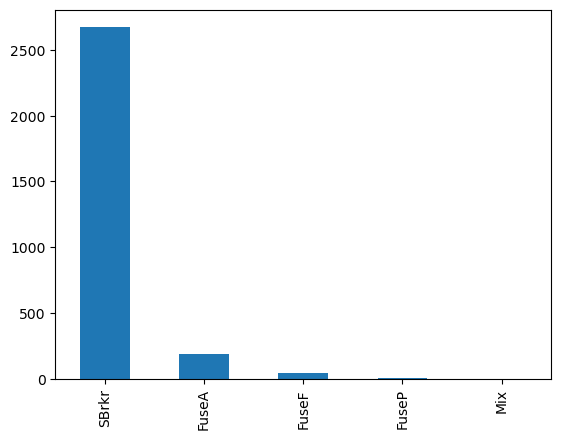

In [142]:
fnc_Column_Analysis('Electrical')

In [143]:
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

Data Type String
Electrical Unique List..................................: ['SBrkr' 'FuseA' 'FuseF' 'FuseP' 'Mix']
Electrical Mode List....................................: 0    SBrkr
Name: Electrical, dtype: object
Electrical NullCount List...............................: 0


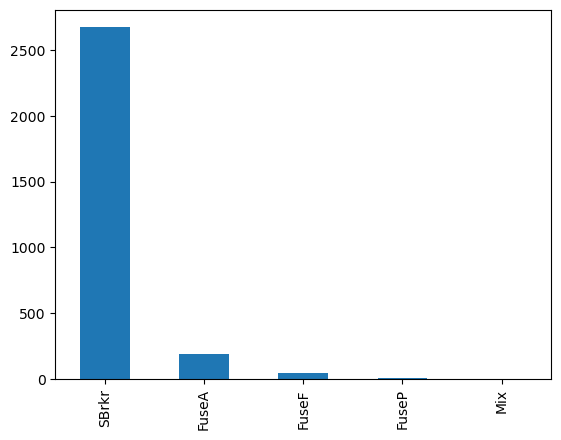

In [144]:
fnc_Column_Analysis('Electrical')

###### 44.	1stFlrSF: First Floor square feet

Data Type integer
1stFlrSF Mode List....................................: 0    864
Name: 1stFlrSF, dtype: int64
1stFlrSF NullCount List...............................: 0


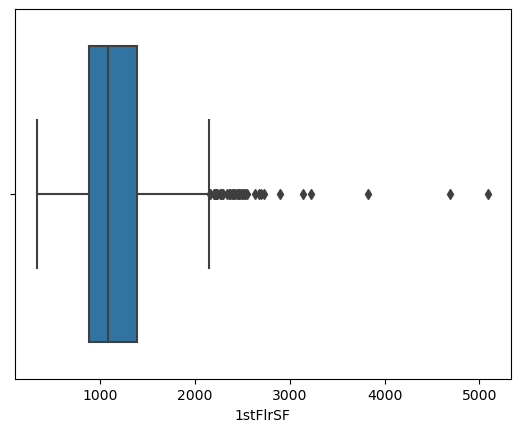

In [145]:
fnc_Column_Analysis('1stFlrSF')

In [146]:
df["1stFlrSF"] =np.where(df["1stFlrSF"] > 2000, 2000, df["1stFlrSF"])

<AxesSubplot:xlabel='1stFlrSF'>

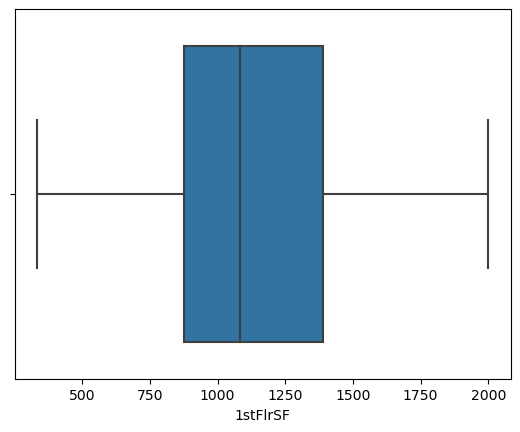

In [147]:
sns.boxplot(df['1stFlrSF'])

###### 45.	2ndFlrSF: Second floor square feet

Data Type integer
2ndFlrSF Mode List....................................: 0    0
Name: 2ndFlrSF, dtype: int64
2ndFlrSF NullCount List...............................: 0


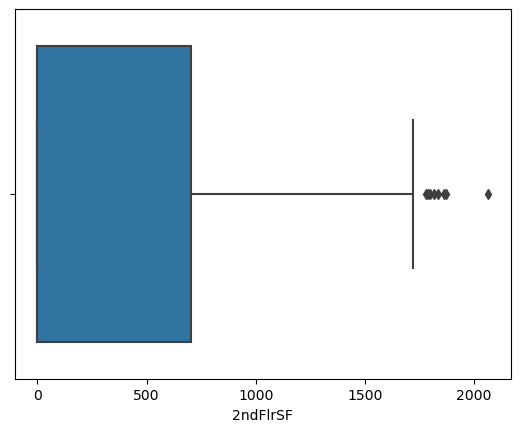

In [148]:
fnc_Column_Analysis('2ndFlrSF')

In [149]:
df["2ndFlrSF"] =np.where(df["2ndFlrSF"] > 1650, 1650, df["2ndFlrSF"])

<AxesSubplot:xlabel='2ndFlrSF'>

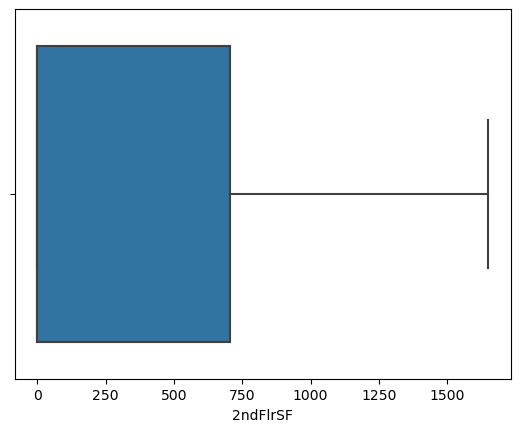

In [150]:
sns.boxplot(df['2ndFlrSF'])

###### 46.	LowQualFinSF: Low quality finished square feet (all floors)

Data Type integer
LowQualFinSF Mode List....................................: 0    0
Name: LowQualFinSF, dtype: int64
LowQualFinSF NullCount List...............................: 0


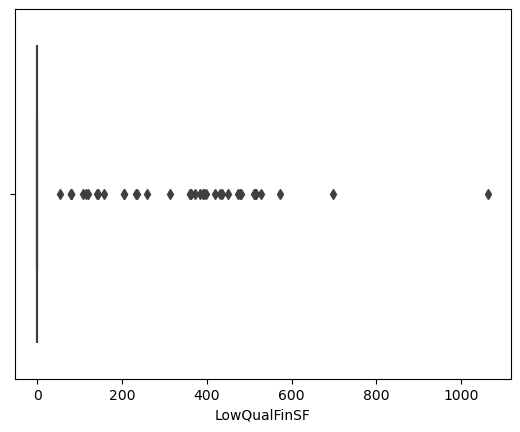

In [151]:
fnc_Column_Analysis('LowQualFinSF')

In [152]:
df["LowQualFinSF"] =np.where(df["LowQualFinSF"] > 650, 650, df["LowQualFinSF"])

<AxesSubplot:xlabel='LowQualFinSF'>

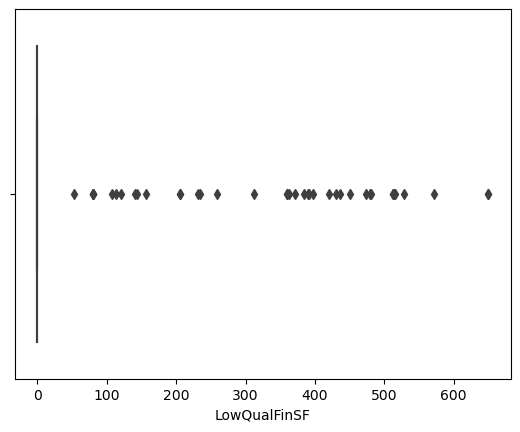

In [153]:
sns.boxplot(df.LowQualFinSF)

###### 47.	GrLivArea: Above grade (ground) living area square feet

Data Type integer
GrLivArea Mode List....................................: 0    864
Name: GrLivArea, dtype: int64
GrLivArea NullCount List...............................: 0


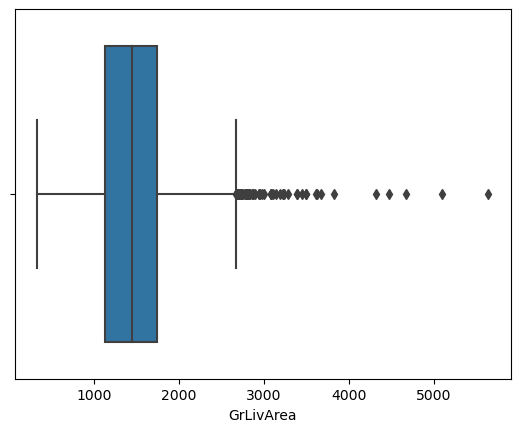

In [154]:
fnc_Column_Analysis('GrLivArea')

In [155]:

df["GrLivArea"] =np.where(df["GrLivArea"] > 3850, 3850, df["GrLivArea"])

<AxesSubplot:xlabel='GrLivArea'>

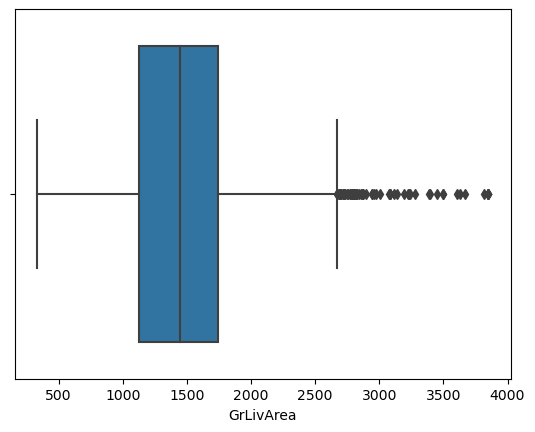

In [156]:
sns.boxplot(df.GrLivArea)

###### 48.	BsmtFullBath: Basement full bathrooms

Data Type integer
BsmtFullBath Mode List....................................: 0    0.0
Name: BsmtFullBath, dtype: float64
BsmtFullBath NullCount List...............................: 2
Na Dönüşümü Yapıldı


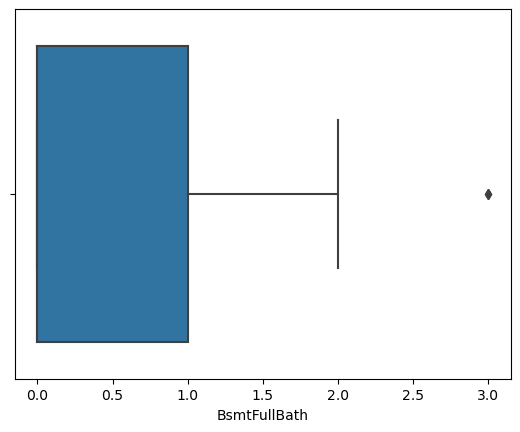

In [157]:
fnc_Column_Analysis('BsmtFullBath')

In [158]:
df["BsmtFullBath"] =np.where(df["BsmtFullBath"] > 2, 2, df["BsmtFullBath"])

<AxesSubplot:xlabel='BsmtFullBath'>

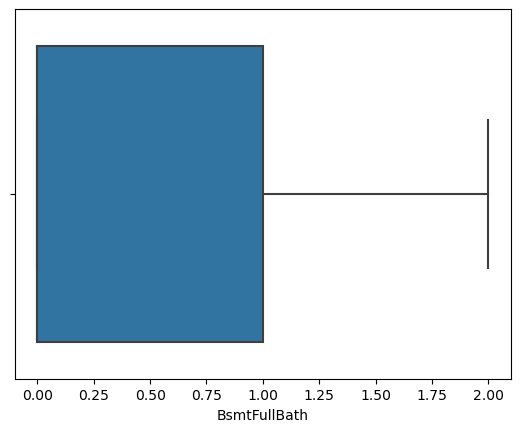

In [159]:
sns.boxplot(df.BsmtFullBath)

###### 49.	BsmtHalfBath: Basement half bathrooms

Data Type integer
BsmtHalfBath Mode List....................................: 0    0.0
Name: BsmtHalfBath, dtype: float64
BsmtHalfBath NullCount List...............................: 2
Na Dönüşümü Yapıldı


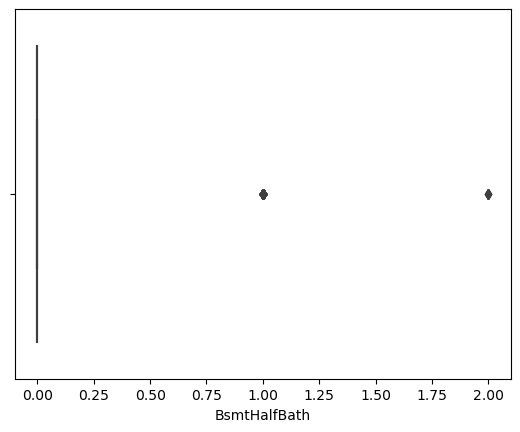

In [160]:
fnc_Column_Analysis('BsmtHalfBath')

In [161]:
df.BsmtHalfBath.fillna(df.BsmtHalfBath.mean(),inplace=True)


In [162]:
df["BsmtHalfBath"] =np.where(df["BsmtHalfBath"] ==0.061364, 1, df["BsmtHalfBath"])

<AxesSubplot:xlabel='BsmtHalfBath'>

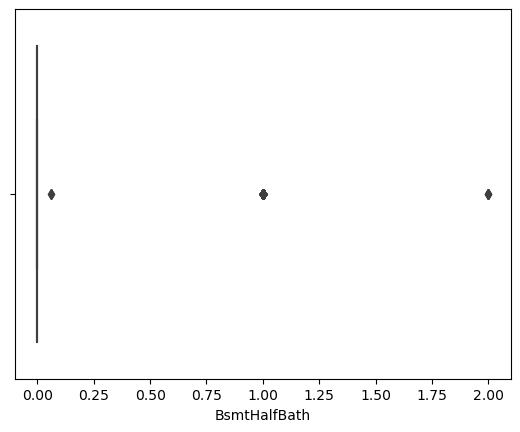

In [163]:
sns.boxplot(df.BsmtHalfBath)

###### 50.	FullBath: Full bathrooms above grade

Data Type integer
FullBath Mode List....................................: 0    2
Name: FullBath, dtype: int64
FullBath NullCount List...............................: 0


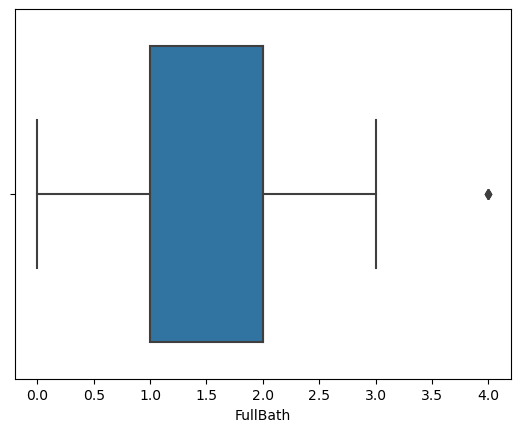

In [164]:
fnc_Column_Analysis('FullBath')

In [165]:
df["FullBath"] =np.where(df["FullBath"] > 3, 3, df["FullBath"])

<AxesSubplot:xlabel='FullBath'>

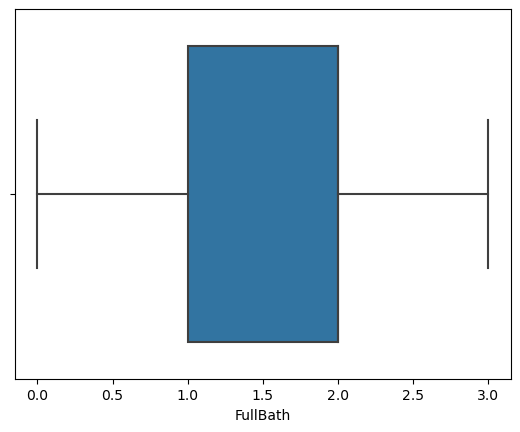

In [166]:
sns.boxplot(df.FullBath)

###### 51.	HalfBath: Half baths above grade

Data Type integer
HalfBath Mode List....................................: 0    0
Name: HalfBath, dtype: int64
HalfBath NullCount List...............................: 0


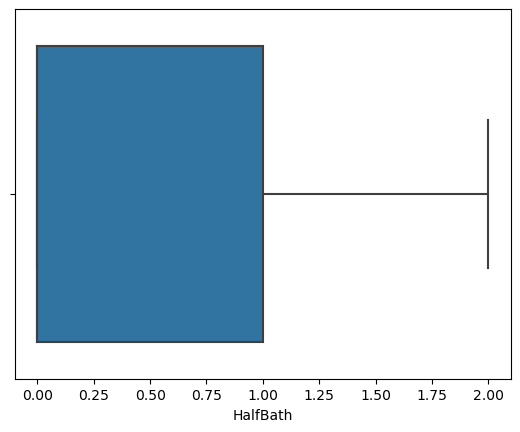

In [167]:

fnc_Column_Analysis('HalfBath')

###### 52.	Bedroom: Number of bedrooms above basement level

Data Type integer
BedroomAbvGr Mode List....................................: 0    3
Name: BedroomAbvGr, dtype: int64
BedroomAbvGr NullCount List...............................: 0


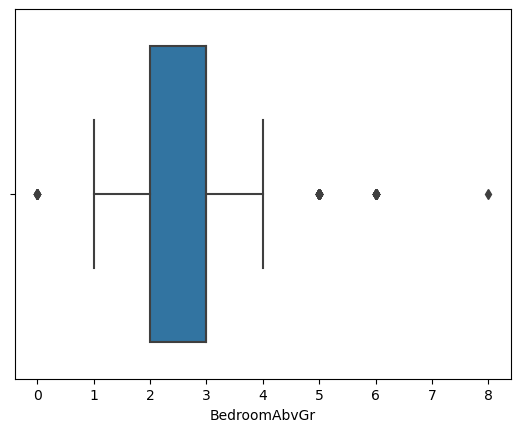

In [168]:
fnc_Column_Analysis('BedroomAbvGr')

In [169]:
df["BedroomAbvGr"] =np.where(df["BedroomAbvGr"] > 4, 4, df["BedroomAbvGr"])

In [170]:
df["BedroomAbvGr"] =np.where(df["BedroomAbvGr"] < 1, 1, df["BedroomAbvGr"])

<AxesSubplot:xlabel='BedroomAbvGr'>

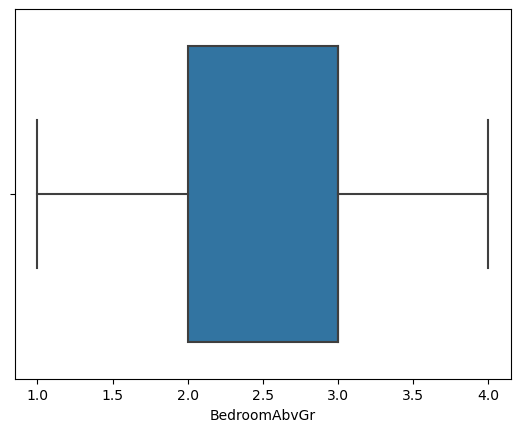

In [171]:
sns.boxplot(df.BedroomAbvGr)

###### 53.	KitchenAbvGr: Number of kitchens

Data Type integer
KitchenAbvGr Mode List....................................: 0    1
Name: KitchenAbvGr, dtype: int64
KitchenAbvGr NullCount List...............................: 0


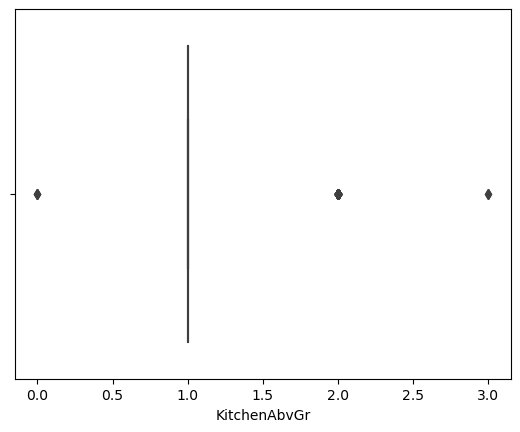

In [172]:
fnc_Column_Analysis('KitchenAbvGr')

###### 54.	KitchenQual: Kitchen quality

Data Type String
KitchenQual Unique List..................................: ['TA' 'Gd' 'Ex' 'Fa' nan]
KitchenQual Mode List....................................: 0    TA
Name: KitchenQual, dtype: object
KitchenQual NullCount List...............................: 1
Na Dönüşümü Yapıldı


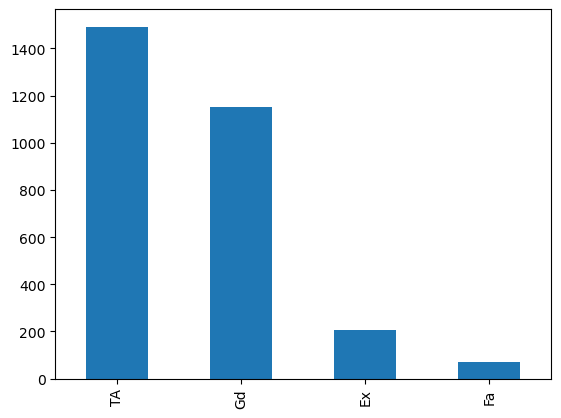

In [173]:
fnc_Column_Analysis('KitchenQual')

In [174]:
df['KitchenQual'].fillna(df['KitchenQual'].mode()[0], inplace=True)

###### 55.	TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Data Type integer
TotRmsAbvGrd Mode List....................................: 0    6
Name: TotRmsAbvGrd, dtype: int64
TotRmsAbvGrd NullCount List...............................: 0


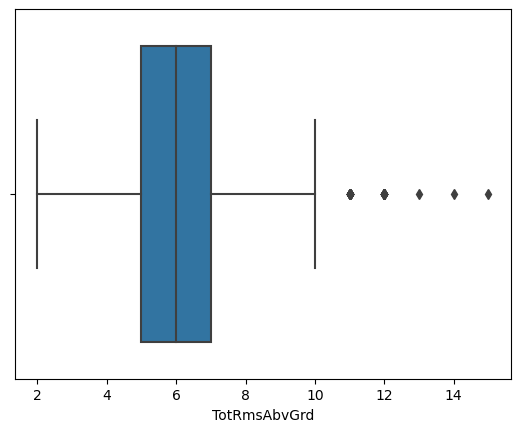

In [175]:
fnc_Column_Analysis('TotRmsAbvGrd')

In [176]:
df["TotRmsAbvGrd"] =np.where(df["TotRmsAbvGrd"] > 10, 10, df["TotRmsAbvGrd"])

<AxesSubplot:xlabel='TotRmsAbvGrd'>

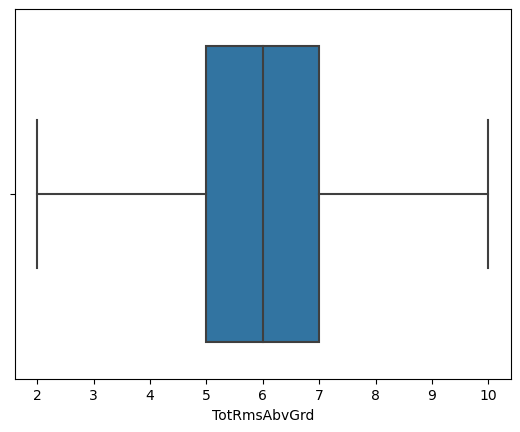

In [177]:
sns.boxplot(df.TotRmsAbvGrd)

###### 56.	Functional: Home functionality rating

Data Type String
Functional Unique List..................................: ['Typ' 'Min2' 'Min1' 'Mod' 'Maj1' 'Sev' 'Maj2' nan]
Functional Mode List....................................: 0    Typ
Name: Functional, dtype: object
Functional NullCount List...............................: 2
Na Dönüşümü Yapıldı


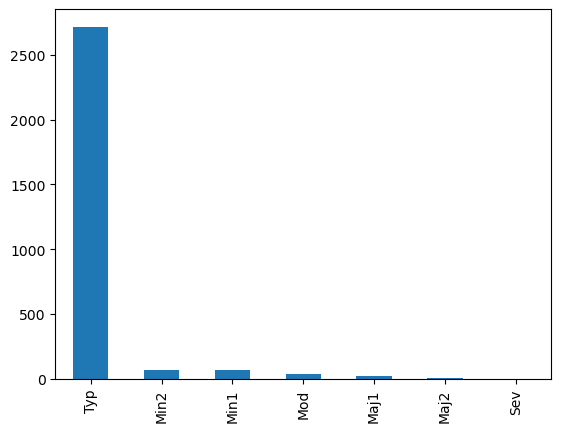

In [178]:
fnc_Column_Analysis('Functional')

In [179]:
df['Functional'].fillna(df['Functional'].mode()[0], inplace=True)

###### 57.	Fireplaces: Number of fireplaces

Data Type integer
Fireplaces Mode List....................................: 0    0
Name: Fireplaces, dtype: int64
Fireplaces NullCount List...............................: 0


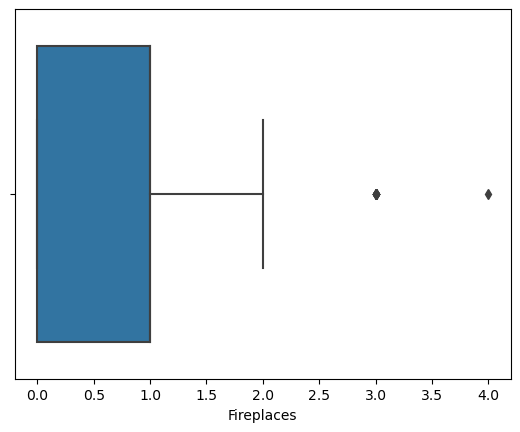

In [180]:
fnc_Column_Analysis('Fireplaces')

In [181]:
df["Fireplaces"] =np.where(df["Fireplaces"] > 2, 2, df["Fireplaces"])

<AxesSubplot:xlabel='Fireplaces'>

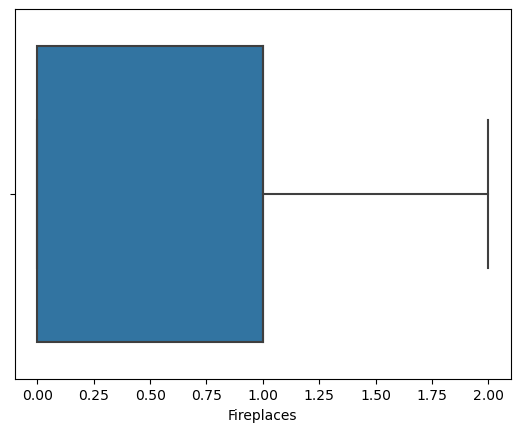

In [182]:
sns.boxplot(df.Fireplaces)

###### 58.	FireplaceQu: Fireplace quality

Data Type String
FireplaceQu Unique List..................................: [nan 'TA' 'Gd' 'Po' 'Fa' 'Ex']
FireplaceQu Mode List....................................: 0    Gd
Name: FireplaceQu, dtype: object
FireplaceQu NullCount List...............................: 1420
Na Dönüşümü Yapıldı


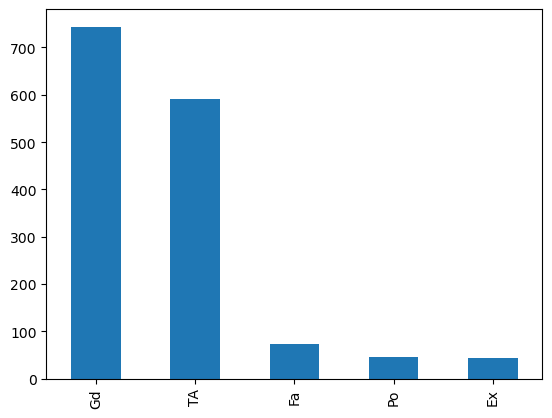

In [183]:
fnc_Column_Analysis('FireplaceQu')

In [184]:
df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0], inplace=True)

###### 59.	GarageType: Garage location

Data Type String
GarageType Unique List..................................: ['Attchd' 'Detchd' 'BuiltIn' nan 'Basment' '2Types' 'CarPort']
GarageType Mode List....................................: 0    Attchd
Name: GarageType, dtype: object
GarageType NullCount List...............................: 157
Na Dönüşümü Yapıldı


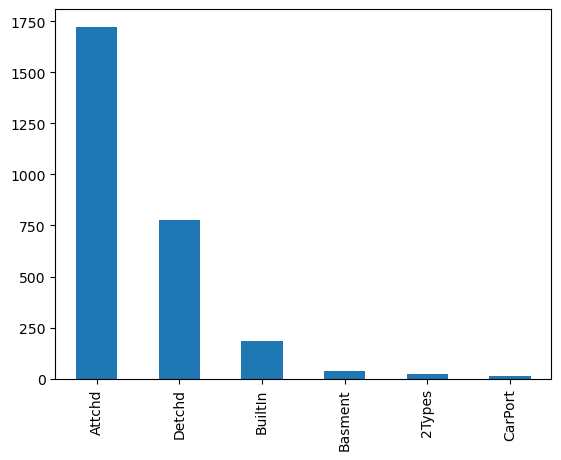

In [185]:
fnc_Column_Analysis('GarageType')

In [186]:
df['GarageType'].fillna(df['GarageType'].mode()[0], inplace=True)

###### 60.	GarageYrBlt: Year garage was built

Data Type integer
GarageYrBlt Mode List....................................: 0    2005.0
Name: GarageYrBlt, dtype: float64
GarageYrBlt NullCount List...............................: 159
Na Dönüşümü Yapıldı


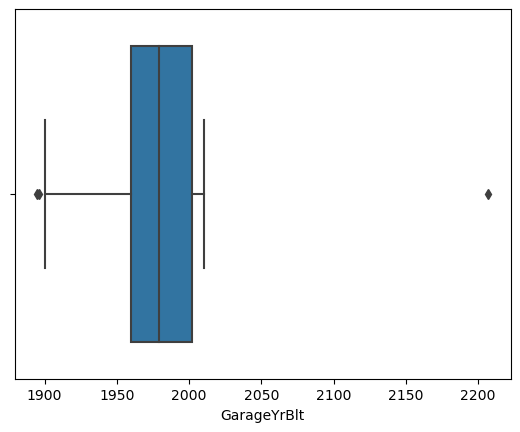

In [187]:
fnc_Column_Analysis('GarageYrBlt')

In [188]:
df["GarageYrBlt"] =np.where(df["GarageYrBlt"] > 2023, 2023, df["GarageYrBlt"])
df["GarageYrBlt"] =np.where(df["GarageYrBlt"] < 1900, 1900, df["GarageYrBlt"])

<AxesSubplot:xlabel='GarageYrBlt'>

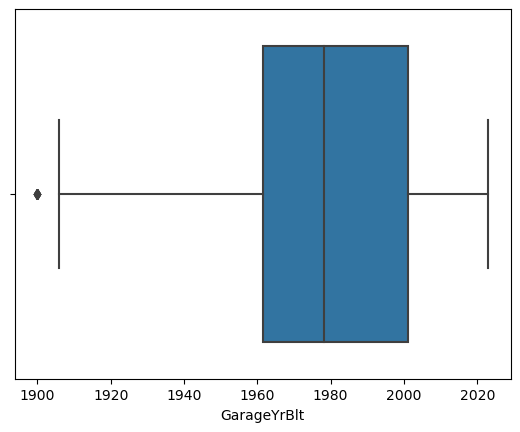

In [189]:
sns.boxplot(df.GarageYrBlt)

In [190]:
df["GarageYrBlt"]=2023-df["GarageYrBlt"]

<AxesSubplot:xlabel='GarageYrBlt'>

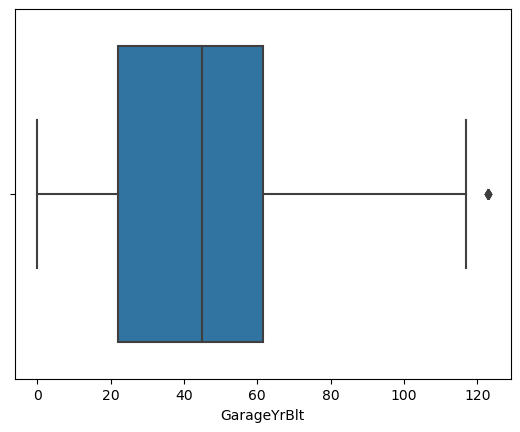

In [191]:
sns.boxplot(df.GarageYrBlt)

###### 61.	GarageFinish: Interior finish of the garage

Data Type String
GarageFinish Unique List..................................: ['Unf' 'Fin' 'RFn' nan]
GarageFinish Mode List....................................: 0    Unf
Name: GarageFinish, dtype: object
GarageFinish NullCount List...............................: 159
Na Dönüşümü Yapıldı


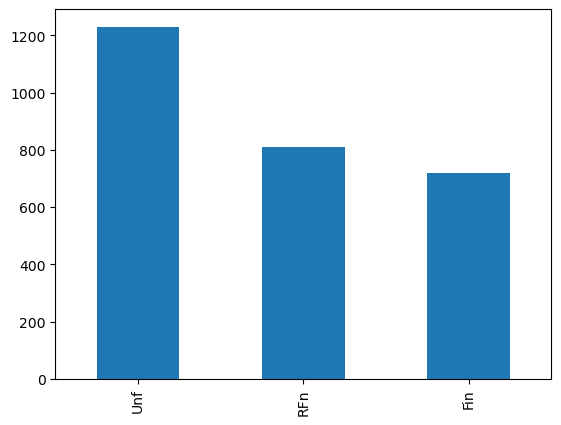

In [192]:
fnc_Column_Analysis('GarageFinish')

In [193]:
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0], inplace=True)

###### 62.	GarageCars: Size of garage in car capacity

Data Type integer
GarageCars Mode List....................................: 0    2.0
Name: GarageCars, dtype: float64
GarageCars NullCount List...............................: 1
Na Dönüşümü Yapıldı


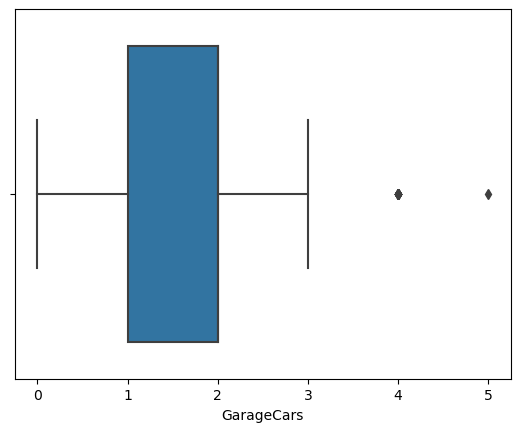

In [194]:
fnc_Column_Analysis('GarageCars')

In [195]:
df["GarageCars"] =np.where(df["GarageCars"] > 3, 3, df["GarageCars"])

<AxesSubplot:xlabel='GarageCars'>

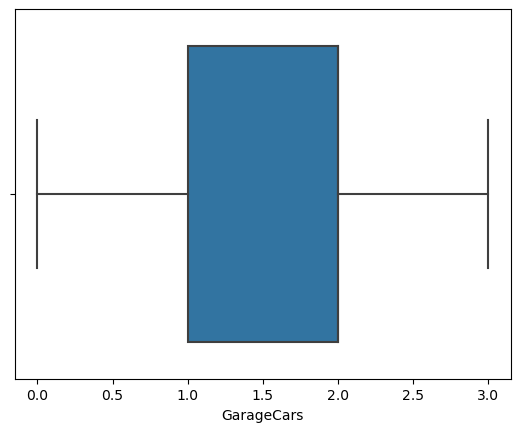

In [196]:
sns.boxplot(df.GarageCars)

###### 63.	GarageArea: Size of garage in square feet

Data Type integer
GarageArea Mode List....................................: 0    0.0
Name: GarageArea, dtype: float64
GarageArea NullCount List...............................: 1
Na Dönüşümü Yapıldı


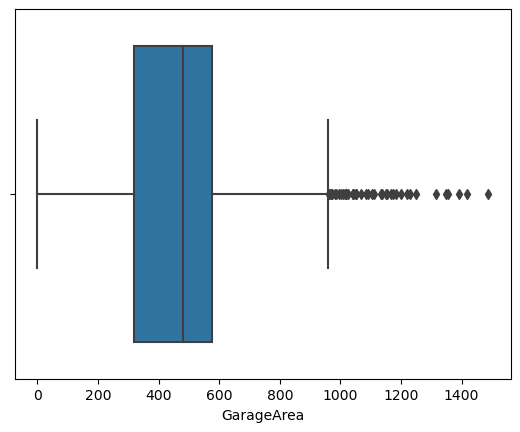

In [197]:
fnc_Column_Analysis('GarageArea')

In [198]:
df["GarageArea"] =np.where(df["GarageArea"] > 1250, 1250, df["GarageArea"])

<AxesSubplot:xlabel='GarageArea'>

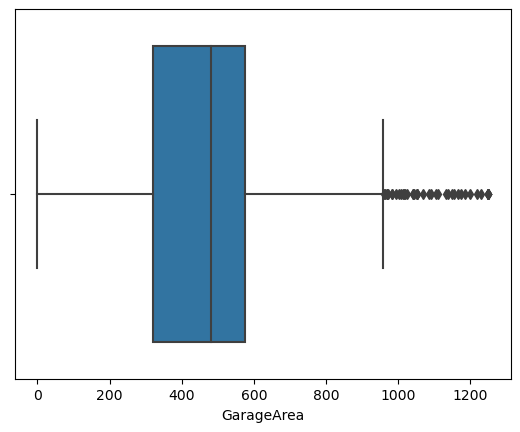

In [199]:
sns.boxplot(df.GarageArea)

###### 64.	GarageQual: Garage quality

Data Type String
GarageQual Unique List..................................: ['TA' nan 'Fa' 'Gd' 'Po' 'Ex']
GarageQual Mode List....................................: 0    TA
Name: GarageQual, dtype: object
GarageQual NullCount List...............................: 159
Na Dönüşümü Yapıldı


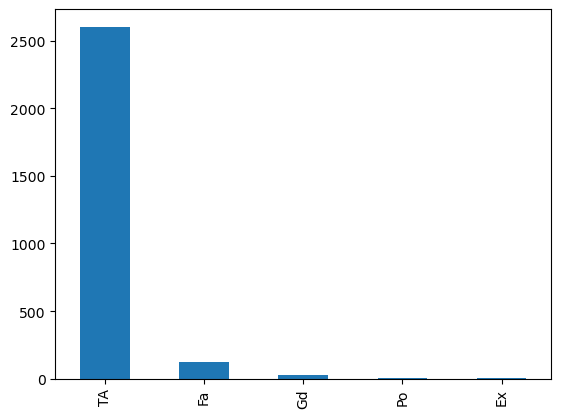

In [200]:
fnc_Column_Analysis('GarageQual')

###### 65.	GarageCond: Garage condition

Data Type String
GarageCond Unique List..................................: ['TA' nan 'Fa' 'Gd' 'Po' 'Ex']
GarageCond Mode List....................................: 0    TA
Name: GarageCond, dtype: object
GarageCond NullCount List...............................: 159
Na Dönüşümü Yapıldı


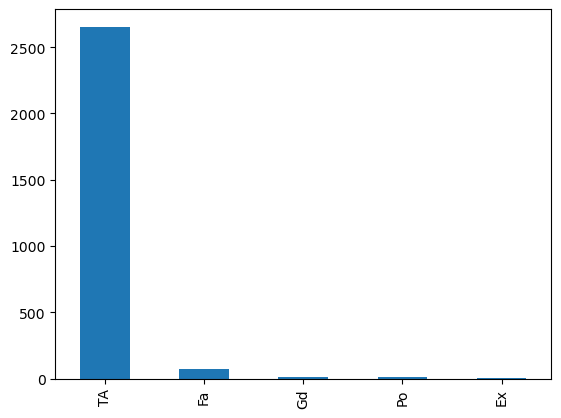

In [201]:
fnc_Column_Analysis('GarageCond')

###### 66.	PavedDrive: Paved driveway

Data Type String
PavedDrive Unique List..................................: ['Y' 'N' 'P']
PavedDrive Mode List....................................: 0    Y
Name: PavedDrive, dtype: object
PavedDrive NullCount List...............................: 0


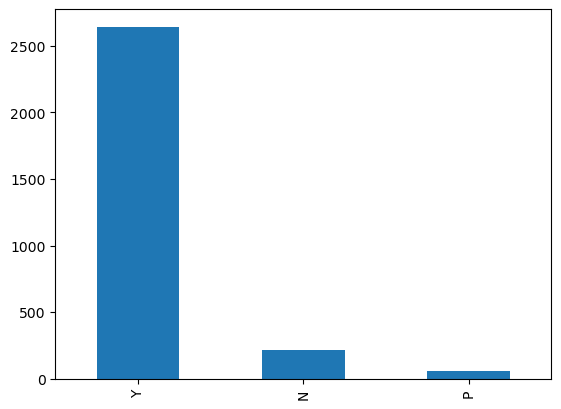

In [202]:
fnc_Column_Analysis('PavedDrive')

###### 67.	WoodDeckSF: Wood deck area in square feet

Data Type integer
WoodDeckSF Mode List....................................: 0    0
Name: WoodDeckSF, dtype: int64
WoodDeckSF NullCount List...............................: 0


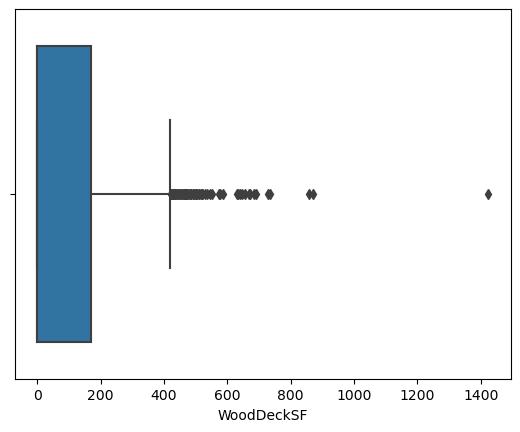

In [203]:
fnc_Column_Analysis('WoodDeckSF')

In [204]:
df["WoodDeckSF"] =np.where(df["WoodDeckSF"] > 700, 700, df["WoodDeckSF"])

<AxesSubplot:xlabel='WoodDeckSF'>

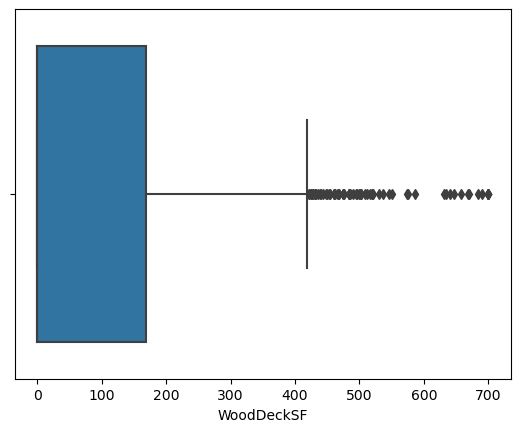

In [205]:
sns.boxplot(df.WoodDeckSF)

###### 68.	OpenPorchSF: Open porch area in square feet

Data Type integer
OpenPorchSF Mode List....................................: 0    0
Name: OpenPorchSF, dtype: int64
OpenPorchSF NullCount List...............................: 0


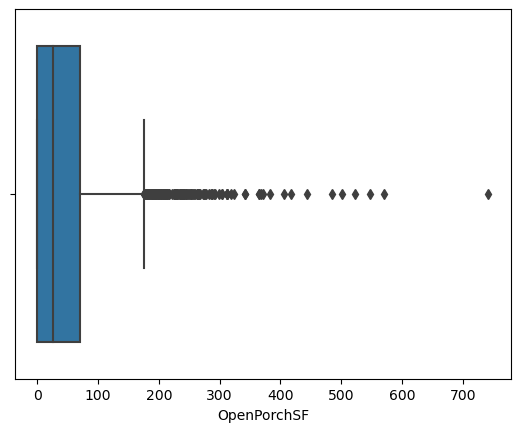

In [206]:
fnc_Column_Analysis('OpenPorchSF')

In [207]:
df["OpenPorchSF"] =np.where(df["OpenPorchSF"] > 350, 350, df["OpenPorchSF"])

<AxesSubplot:xlabel='OpenPorchSF'>

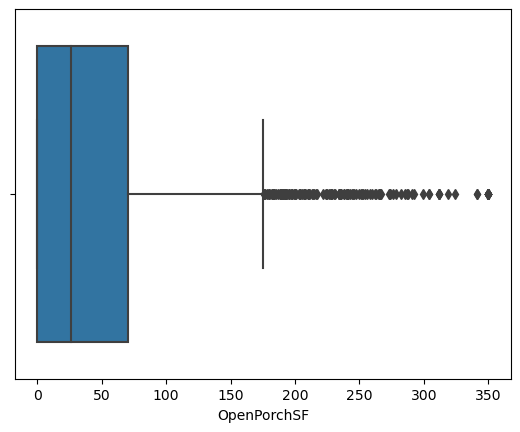

In [208]:
sns.boxplot(df.OpenPorchSF)

###### 69.	EnclosedPorch: Enclosed porch area in square feet

Data Type integer
EnclosedPorch Mode List....................................: 0    0
Name: EnclosedPorch, dtype: int64
EnclosedPorch NullCount List...............................: 0


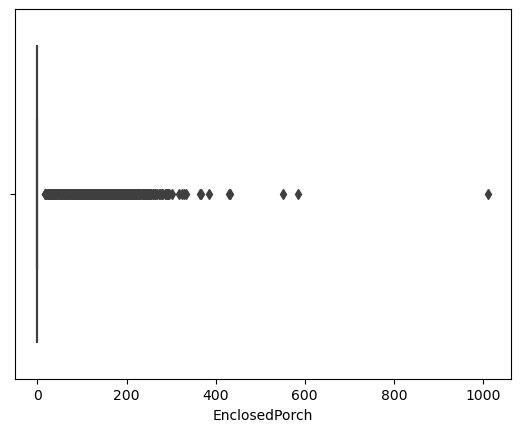

In [209]:
fnc_Column_Analysis('EnclosedPorch')

In [210]:
df["EnclosedPorch"] =np.where(df["EnclosedPorch"] > 400, 400, df["EnclosedPorch"])

<AxesSubplot:xlabel='EnclosedPorch'>

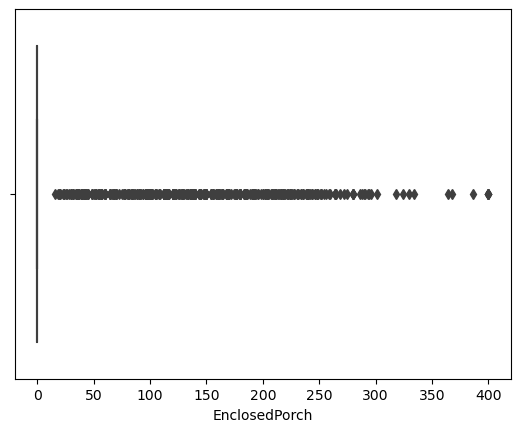

In [211]:
sns.boxplot(df.EnclosedPorch)

###### 70.	3SsnPorch: Three season porch area in square feet

Data Type integer
3SsnPorch Mode List....................................: 0    0
Name: 3SsnPorch, dtype: int64
3SsnPorch NullCount List...............................: 0


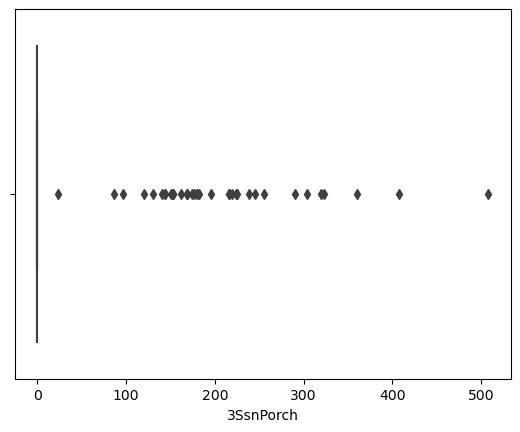

In [212]:
fnc_Column_Analysis('3SsnPorch')

In [213]:
df["3SsnPorch"] =np.where(df["3SsnPorch"] > 250, 250, df["3SsnPorch"])

<AxesSubplot:xlabel='3SsnPorch'>

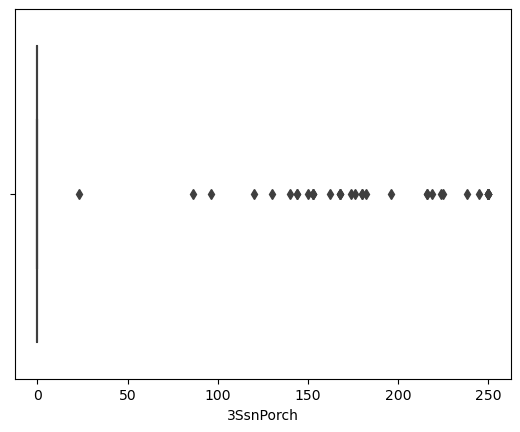

In [214]:
sns.boxplot(df["3SsnPorch"])

###### 71.	ScreenPorch: Screen porch area in square feet

Data Type integer
ScreenPorch Mode List....................................: 0    0
Name: ScreenPorch, dtype: int64
ScreenPorch NullCount List...............................: 0


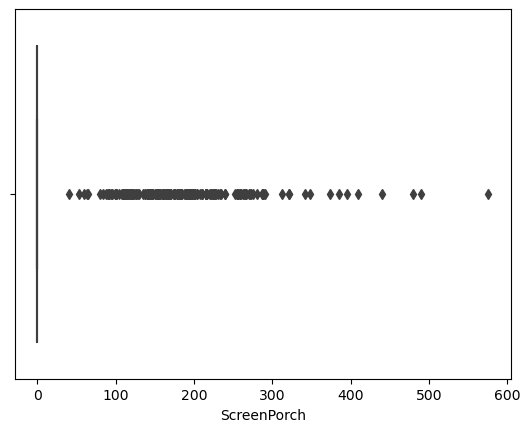

In [215]:
fnc_Column_Analysis('ScreenPorch')

In [216]:
df["ScreenPorch"] =np.where(df["ScreenPorch"] > 350, 350, df["ScreenPorch"])

<AxesSubplot:xlabel='ScreenPorch'>

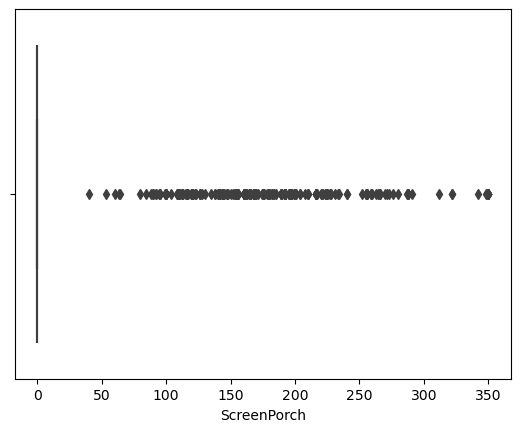

In [217]:
sns.boxplot(df.ScreenPorch)

###### 72.	PoolArea: Pool area in square feet

Data Type integer
PoolArea Mode List....................................: 0    0
Name: PoolArea, dtype: int64
PoolArea NullCount List...............................: 0


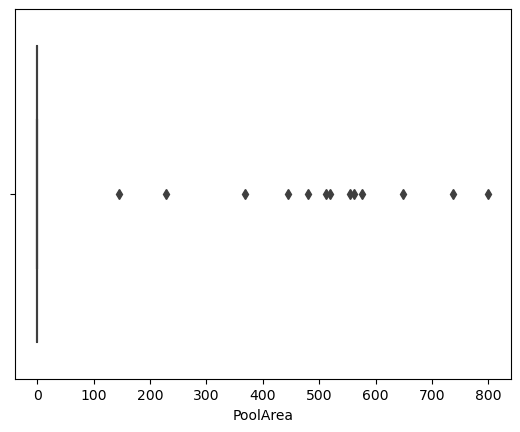

In [218]:
fnc_Column_Analysis('PoolArea')

###### 73.	PoolQC: Pool quality

Data Type String
PoolQC Unique List..................................: [nan 'Ex' 'Gd' 'Fa']
PoolQC Mode List....................................: 0    Ex
1    Gd
Name: PoolQC, dtype: object
PoolQC NullCount List...............................: 2909
Na Dönüşümü Yapıldı


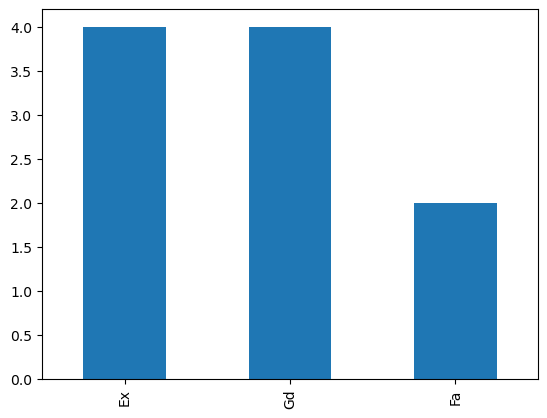

In [219]:
fnc_Column_Analysis('PoolQC')

###### 74.	Fence: Fence quality

Data Type String
Fence Unique List..................................: ['MnPrv' nan 'GdPrv' 'GdWo' 'MnWw']
Fence Mode List....................................: 0    MnPrv
Name: Fence, dtype: object
Fence NullCount List...............................: 2348
Na Dönüşümü Yapıldı


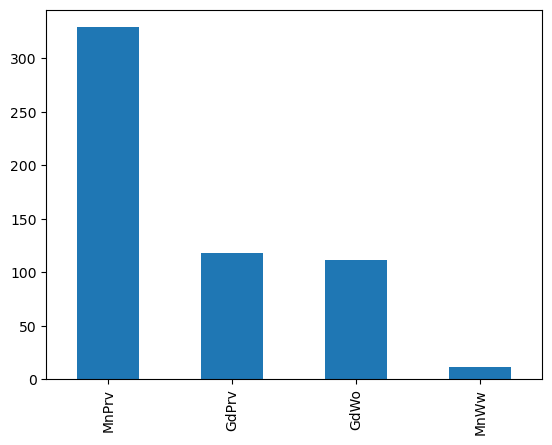

In [220]:
fnc_Column_Analysis('Fence')

###### 75.	MiscFeature: Miscellaneous feature not covered in other categories

Data Type String
MiscFeature Unique List..................................: [nan 'Gar2' 'Shed' 'Othr' 'TenC']
MiscFeature Mode List....................................: 0    Shed
Name: MiscFeature, dtype: object
MiscFeature NullCount List...............................: 2814
Na Dönüşümü Yapıldı


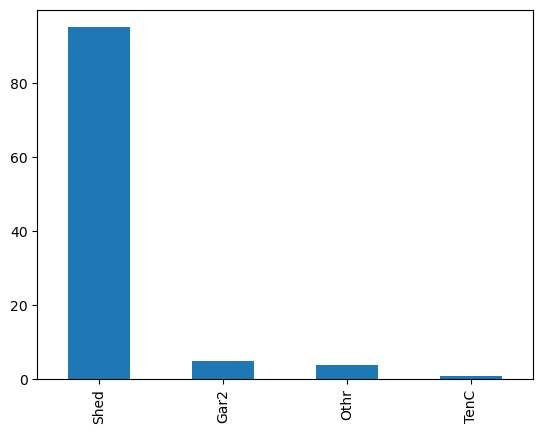

In [221]:
fnc_Column_Analysis('MiscFeature')

###### 76.	MiscVal: $Value of miscellaneous feature

Data Type integer
MiscVal Mode List....................................: 0    0
Name: MiscVal, dtype: int64
MiscVal NullCount List...............................: 0


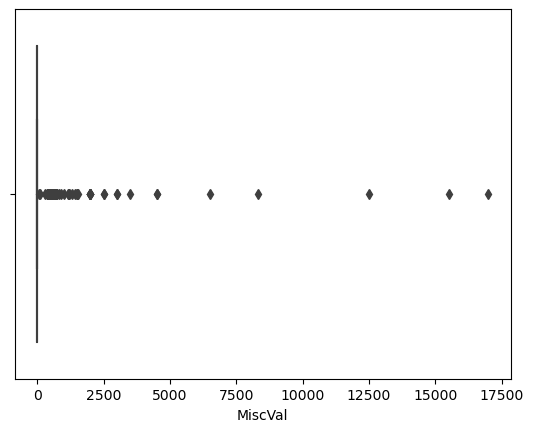

In [222]:
fnc_Column_Analysis('MiscVal')

In [223]:
df["MiscVal"] =np.where(df["MiscVal"] > 1750, 1750, df["MiscVal"])

<AxesSubplot:xlabel='MiscVal'>

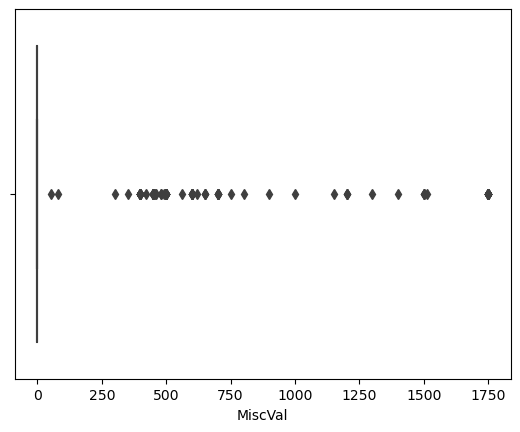

In [224]:
sns.boxplot(df.MiscVal)

###### 77.	MoSold: Month Sold

Data Type integer
MoSold Mode List....................................: 0    6
Name: MoSold, dtype: int64
MoSold NullCount List...............................: 0


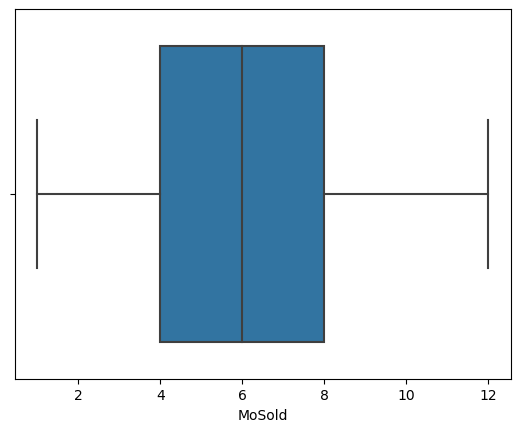

In [225]:
fnc_Column_Analysis('MoSold')

<AxesSubplot:xlabel='SalePrice', ylabel='MoSold'>

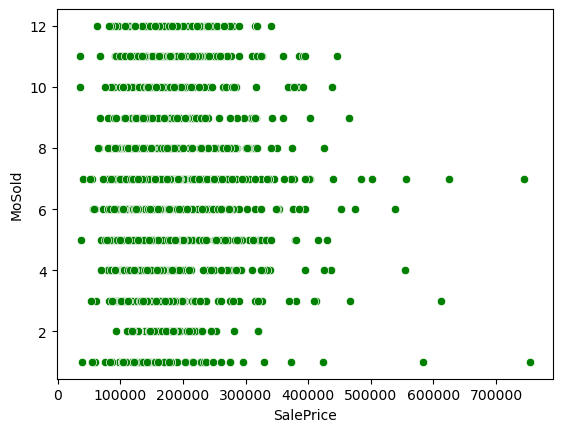

In [226]:
##Aylara göre Fiyat Dağılımını Görmüş olıuuorz.
sns.scatterplot(x='SalePrice',y='MoSold',data=df,color='g')

###### 78.	YrSold: Year Sold

Data Type integer
YrSold Mode List....................................: 0    2007
Name: YrSold, dtype: int64
YrSold NullCount List...............................: 0


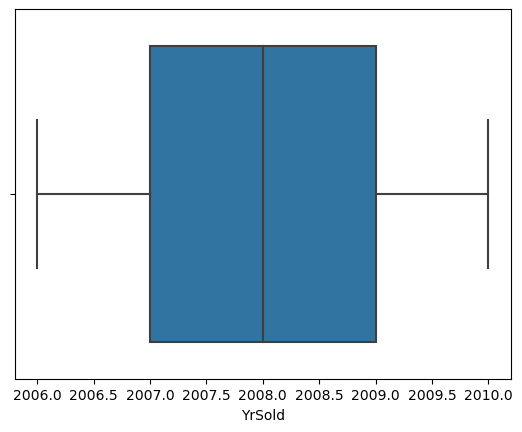

In [227]:
fnc_Column_Analysis('YrSold')

<AxesSubplot:xlabel='SalePrice', ylabel='YrSold'>

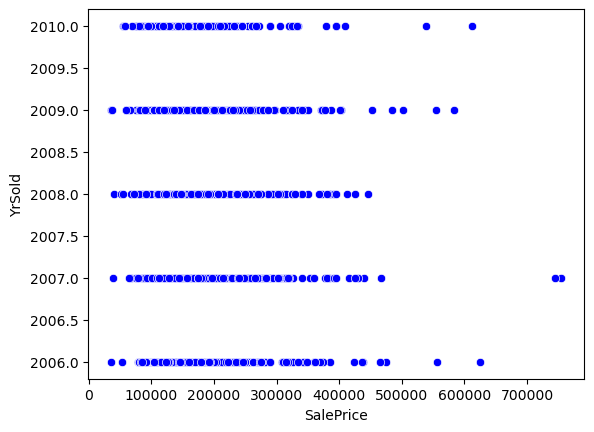

In [228]:
##Aylara göre Fiyat Dağılımını Görmüş olıuuorz.
sns.scatterplot(x='SalePrice',y='YrSold',data=df,color='b')

In [229]:
df["YrSold"]=2023-df["YrSold"]

<AxesSubplot:xlabel='SalePrice', ylabel='YrSold'>

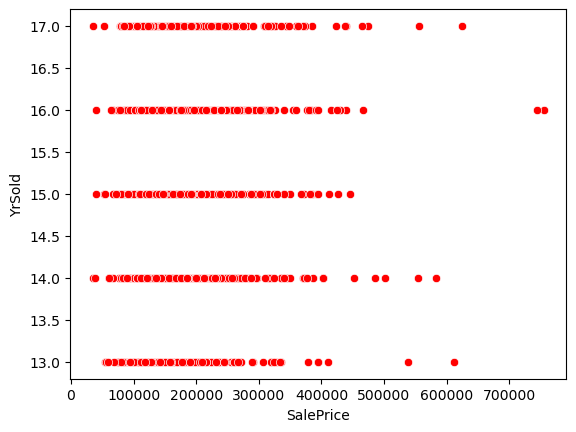

In [230]:
sns.scatterplot(x='SalePrice',y='YrSold',data=df,color='r')

###### 79.	SaleType: Type of sale

Data Type String
SaleType Unique List..................................: ['WD' 'COD' 'New' 'ConLD' 'Oth' 'Con' 'ConLw' 'ConLI' 'CWD' nan]
SaleType Mode List....................................: 0    WD
Name: SaleType, dtype: object
SaleType NullCount List...............................: 1
Na Dönüşümü Yapıldı


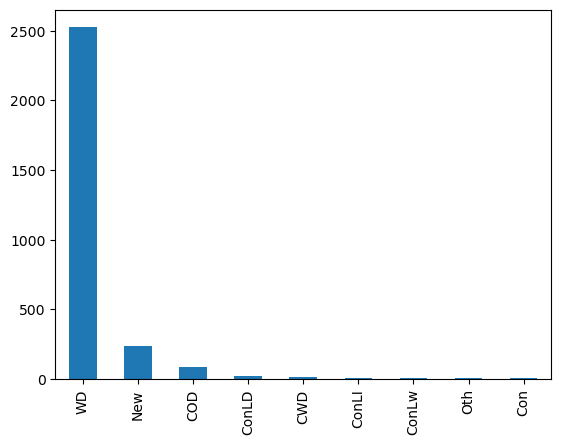

In [231]:
fnc_Column_Analysis('SaleType')

###### 80.	SaleCondition: Condition of sale

Data Type String
SaleCondition Unique List..................................: ['Normal' 'Partial' 'Abnorml' 'Family' 'Alloca' 'AdjLand']
SaleCondition Mode List....................................: 0    Normal
Name: SaleCondition, dtype: object
SaleCondition NullCount List...............................: 0


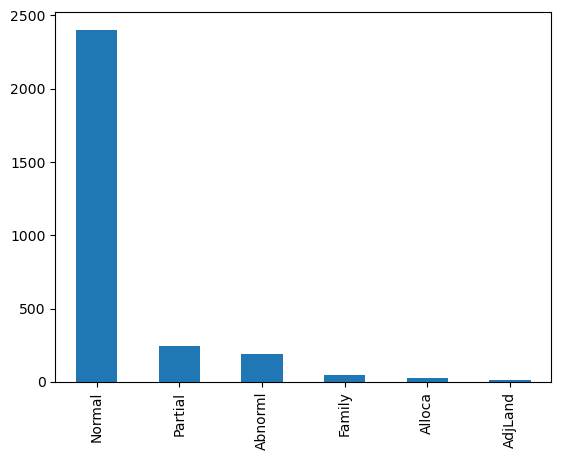

In [232]:
fnc_Column_Analysis('SaleCondition')

# Feature Engineering

In [233]:
##Kolonlardaki BoşKayıtlara Bakıyoruz ve büyükten küçüğe göre sıralıuoruz
df.isnull().sum().sort_values(ascending=False).head(50) 

SalePrice        1459
CentralAir          0
GarageYrBlt         0
GarageType          0
FireplaceQu         0
Fireplaces          0
Functional          0
TotRmsAbvGrd        0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
BsmtFullBath        0
GrLivArea           0
LowQualFinSF        0
2ndFlrSF            0
1stFlrSF            0
GarageFinish        0
GarageCars          0
GarageArea          0
PoolQC              0
SaleCondition       0
SaleType            0
YrSold              0
MoSold              0
MiscVal             0
MiscFeature         0
Fence               0
PoolArea            0
GarageQual          0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
GarageCond          0
Electrical          0
Id                  0
MSSubClass          0
Heating             0
OverallCond         0
OverallQual         0
HouseStyle

In [234]:
df.shape

(2919, 81)

In [235]:
##Komşu Eve göre Ortalama Fiyata Belirlemek daha doğru olur.
## LotFrontage	486 Boş Kayıtları Komşu ya göre doldurmuş oluyoruz.
## MasVnrArea	23
##None Verileri Dönüştürülmesi , Mode , Mean e göre

###df['LotFrontage'].fillna(df.groupby('Neighborhood')['LotFrontage'].transform('mean'),inplace=True)
###df['MasVnrArea'].fillna(df.groupby('Neighborhood')['MasVnrArea'].transform('mean'),inplace=True)
###df['BsmtFullBath'].fillna(df.groupby('Neighborhood')['BsmtFullBath'].transform('mean'),inplace=True)
###df['BsmtHalfBath'].fillna(df.groupby('Neighborhood')['BsmtHalfBath'].transform('mean'),inplace=True) 
###df['GarageCars'].fillna(df.groupby('Neighborhood')['GarageCars'].transform('mean'),inplace=True) 
###df['GarageArea'].fillna(df.groupby('Neighborhood')['GarageArea'].transform('mean'),inplace=True) 
###df['BsmtFinSF1'].fillna(df.groupby('Neighborhood')['BsmtFinSF1'].transform('mean'),inplace=True) 
###df['BsmtFinSF2'].fillna(df.groupby('Neighborhood')['BsmtFinSF2'].transform('mean'),inplace=True) 
###df['BsmtUnfSF'].fillna(df.groupby('Neighborhood')['BsmtUnfSF'].transform('mean'),inplace=True) 
###df['TotalBsmtSF'].fillna(df.groupby('Neighborhood')['TotalBsmtSF'].transform('mean'),inplace=True)  
###df['GarageYrBlt'].fillna(df.groupby('Neighborhood')['GarageYrBlt'].transform('mean'),inplace=True)  
###df['garage_age'].fillna(df.groupby('Neighborhood')['garage_age'].transform('mean'),inplace=True) 
###df['age'].fillna(df.groupby('Neighborhood')['age'].transform('mean'),inplace=True) 
###df['sold_age'].fillna(df.groupby('Neighborhood')['sold_age'].transform('mean'),inplace=True) 
###df['remodel_age'].fillna(df.groupby('Neighborhood')['remodel_age'].transform('mean'),inplace=True) 
###df['SalePrice']=df['SalePrice'].fillna(0)

In [236]:
#df['age'].max()

In [237]:
#df=df[df["LotFrontage"]<240] ## 250 Altındaki Veriler daha anlamlı ##1
##df=df[df["LotArea"]<140000] ## 100k altındaki veriler daha an
#df=df[df["YearBuilt"]<140]
#df=df[df["GarageYrBlt"]<140]

In [238]:
##GarageCond	159 --Mode Bilgisi TA ya göre dolduruyoruz
##df["GarageCond"]=df["GarageCond"].fillna(df["GarageCond"].mode()) 
#df["GarageCond"]=df["GarageCond"].fillna('TA')


In [239]:
## 

###cols = ["PoolQC","GarageFinish","GarageCond","BsmtCond", "BsmtQual","BsmtFinType2","BsmtFinType1",
###        "MasVnrType","GarageType","MiscFeature","Alley","FireplaceQu","GarageQual","BsmtExposure",
###       "MSZoning","Fence","Functional","Utilities","Exterior2nd","Electrical","Exterior1st","SaleType",
###       "KitchenQual"
###       ]
###df[cols]=df[cols].fillna(df.mode().iloc[0])

In [240]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave  Grvl      Reg   
1  1462          20       RL         81.0    14267   Pave  Grvl      IR1   
2  1463          60       RL         74.0    13830   Pave  Grvl      IR1   
3  1464          60       RL         78.0     9978   Pave  Grvl      IR1   
4  1465         120       RL         43.0     5005   Pave  Grvl      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6         62   
1       Norm     1Fam     1Story            6            6         65   
2       Norm     1Fam     2Story            5            5         26   
3       Norm     1Fam     2Story            6            6         25   
4       Norm   TwnhsE     1Story            8            5         31   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            62     Gable  CompShg     VinylSd     VinylSd       None   
1            65       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2            25     Gable  CompShg     VinylSd     VinylSd       None   
3            25     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4            31     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0          Gd   
1             1          Gd             6        Typ           0          Gd   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [241]:
##Yukarda Dönüştürdüğümüz Alanları Tekrar Kaldırabiliriz.
## Boş Veri ve ID gibi Primary Key  ALanaların  Modele bir faydası olmayacağı için silmemiz daha doğru olur
#columns=['Id'] 
#df=df.drop(columns,axis=1) ##axis=1 Column , 0 --> Row 

In [242]:
df.shape

(2919, 81)

In [243]:
df.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.008931    -0.024553 -0.035617    -0.029771   
MSSubClass     0.008931    1.000000    -0.401689 -0.241285     0.033638   
LotFrontage   -0.024553   -0.401689     1.000000  0.406403     0.204616   
LotArea       -0.035617   -0.241285     0.406403  1.000000     0.117714   
OverallQual   -0.029771    0.033638     0.204616  0.117714     1.000000   
OverallCond   -0.002839   -0.065625    -0.072112 -0.043149    -0.093847   
YearBuilt      0.016713   -0.034555    -0.119379 -0.030995    -0.598485   
YearRemodAdd   0.050438   -0.043315    -0.084302 -0.030122    -0.571532   
MasVnrArea    -0.025280    0.007437     0.195002  0.120357     0.443647   
BsmtFinSF1    -0.019182   -0.063493     0.166319  0.188565     0.271307   
BsmtFinSF2     0.018471   -0.072904     0.043114  0.076873    -0.045374   
BsmtUnfSF     -0.012901   -0.127259     0.104660  0.029963     0.270607   
TotalBsmtSF   -0.025625   -0.230672     0.307942  0.257035     0.549356   
1stFlrSF      -0.012652   -0.256345     0.408556  0.351689     0.480702   
2ndFlrSF      -0.022515    0.310415     0.021348  0.038786     0.244661   
LowQualFinSF  -0.041924    0.028878     0.007184  0.001724    -0.046797   
GrLivArea     -0.029440    0.073706     0.336251  0.317065     0.577265   
BsmtFullBath   0.000412    0.008984     0.099831  0.131966     0.166334   
BsmtHalfBath   0.010385   -0.001878    -0.022854  0.025129    -0.040713   
FullBath      -0.011048    0.138428     0.168487  0.143423     0.532393   
HalfBath      -0.015358    0.178750     0.035871  0.047480     0.272668   
BedroomAbvGr  -0.002987   -0.043086     0.235739  0.166669     0.094367   
KitchenAbvGr  -0.011702    0.260155     0.005285 -0.022768    -0.159325   
TotRmsAbvGrd  -0.030709    0.034267     0.322892  0.240079     0.396949   
Fireplaces    -0.038871   -0.055173     0.229467  0.286551     0.393585   
GarageYrBlt    0.029629   -0.086238    -0.073031  0.004152    -0.548562   
GarageCars    -0.013763   -0.050549     0.302285  0.211322     0.612668   
GarageArea    -0.009036   -0.104087     0.341589  0.249991     0.567106   
WoodDeckSF    -0.009855   -0.018861     0.110963  0.180754     0.259108   
OpenPorchSF    0.006926   -0.016574     0.155300  0.127392     0.313461   
EnclosedPorch  0.018081   -0.020806     0.002863  0.017865    -0.147319   
3SsnPorch     -0.044551   -0.034016     0.020095  0.020236     0.022060   
ScreenPorch    0.023130   -0.048896     0.074776  0.068014     0.044432   
PoolArea       0.014332   -0.003080     0.141214  0.111473     0.030740   
MiscVal        0.003791   -0.030041     0.020166  0.077888    -0.047202   
MoSold         0.006448   -0.001231     0.010979  0.003948     0.030405   
YrSold         0.256050    0.015028     0.008100  0.032328     0.019614   
SalePrice     -0.021917   -0.084284     0.354863  0.302582     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id               -0.002839   0.016713      0.050438   -0.025280   -0.019182   
MSSubClass       -0.065625  -0.034555     -0.043315    0.007437   -0.063493   
LotFrontage      -0.072112  -0.119379     -0.084302    0.195002    0.166319   
LotArea          -0.043149  -0.030995     -0.030122    0.120357    0.188565   
OverallQual      -0.093847  -0.598485     -0.571532    0.443647    0.271307   
OverallCond       1.000000   0.368541     -0.047654   -0.146423   -0.048308   
YearBuilt         0.368541   1.000000      0.613178   -0.349017   -0.282068   
YearRemodAdd     -0.047654   0.613178      1.000000   -0.209771   -0.149437   
MasVnrArea       -0.146423  -0.349017     -0.209771    1.000000    0.289089   
BsmtFinSF1       -0.048308  -0.282068     -0.149437    0.289089    1.000000   
BsmtFinSF2        0.042831   0.029161      0.063500   -0.015622   -0.054873   
BsmtUnfSF        -0.136455  -0.125622     -0.163530    0.082177   -0.504232   
TotalBsmtSF      -0.184307  -0.425251     -0.304192    0.388958    0

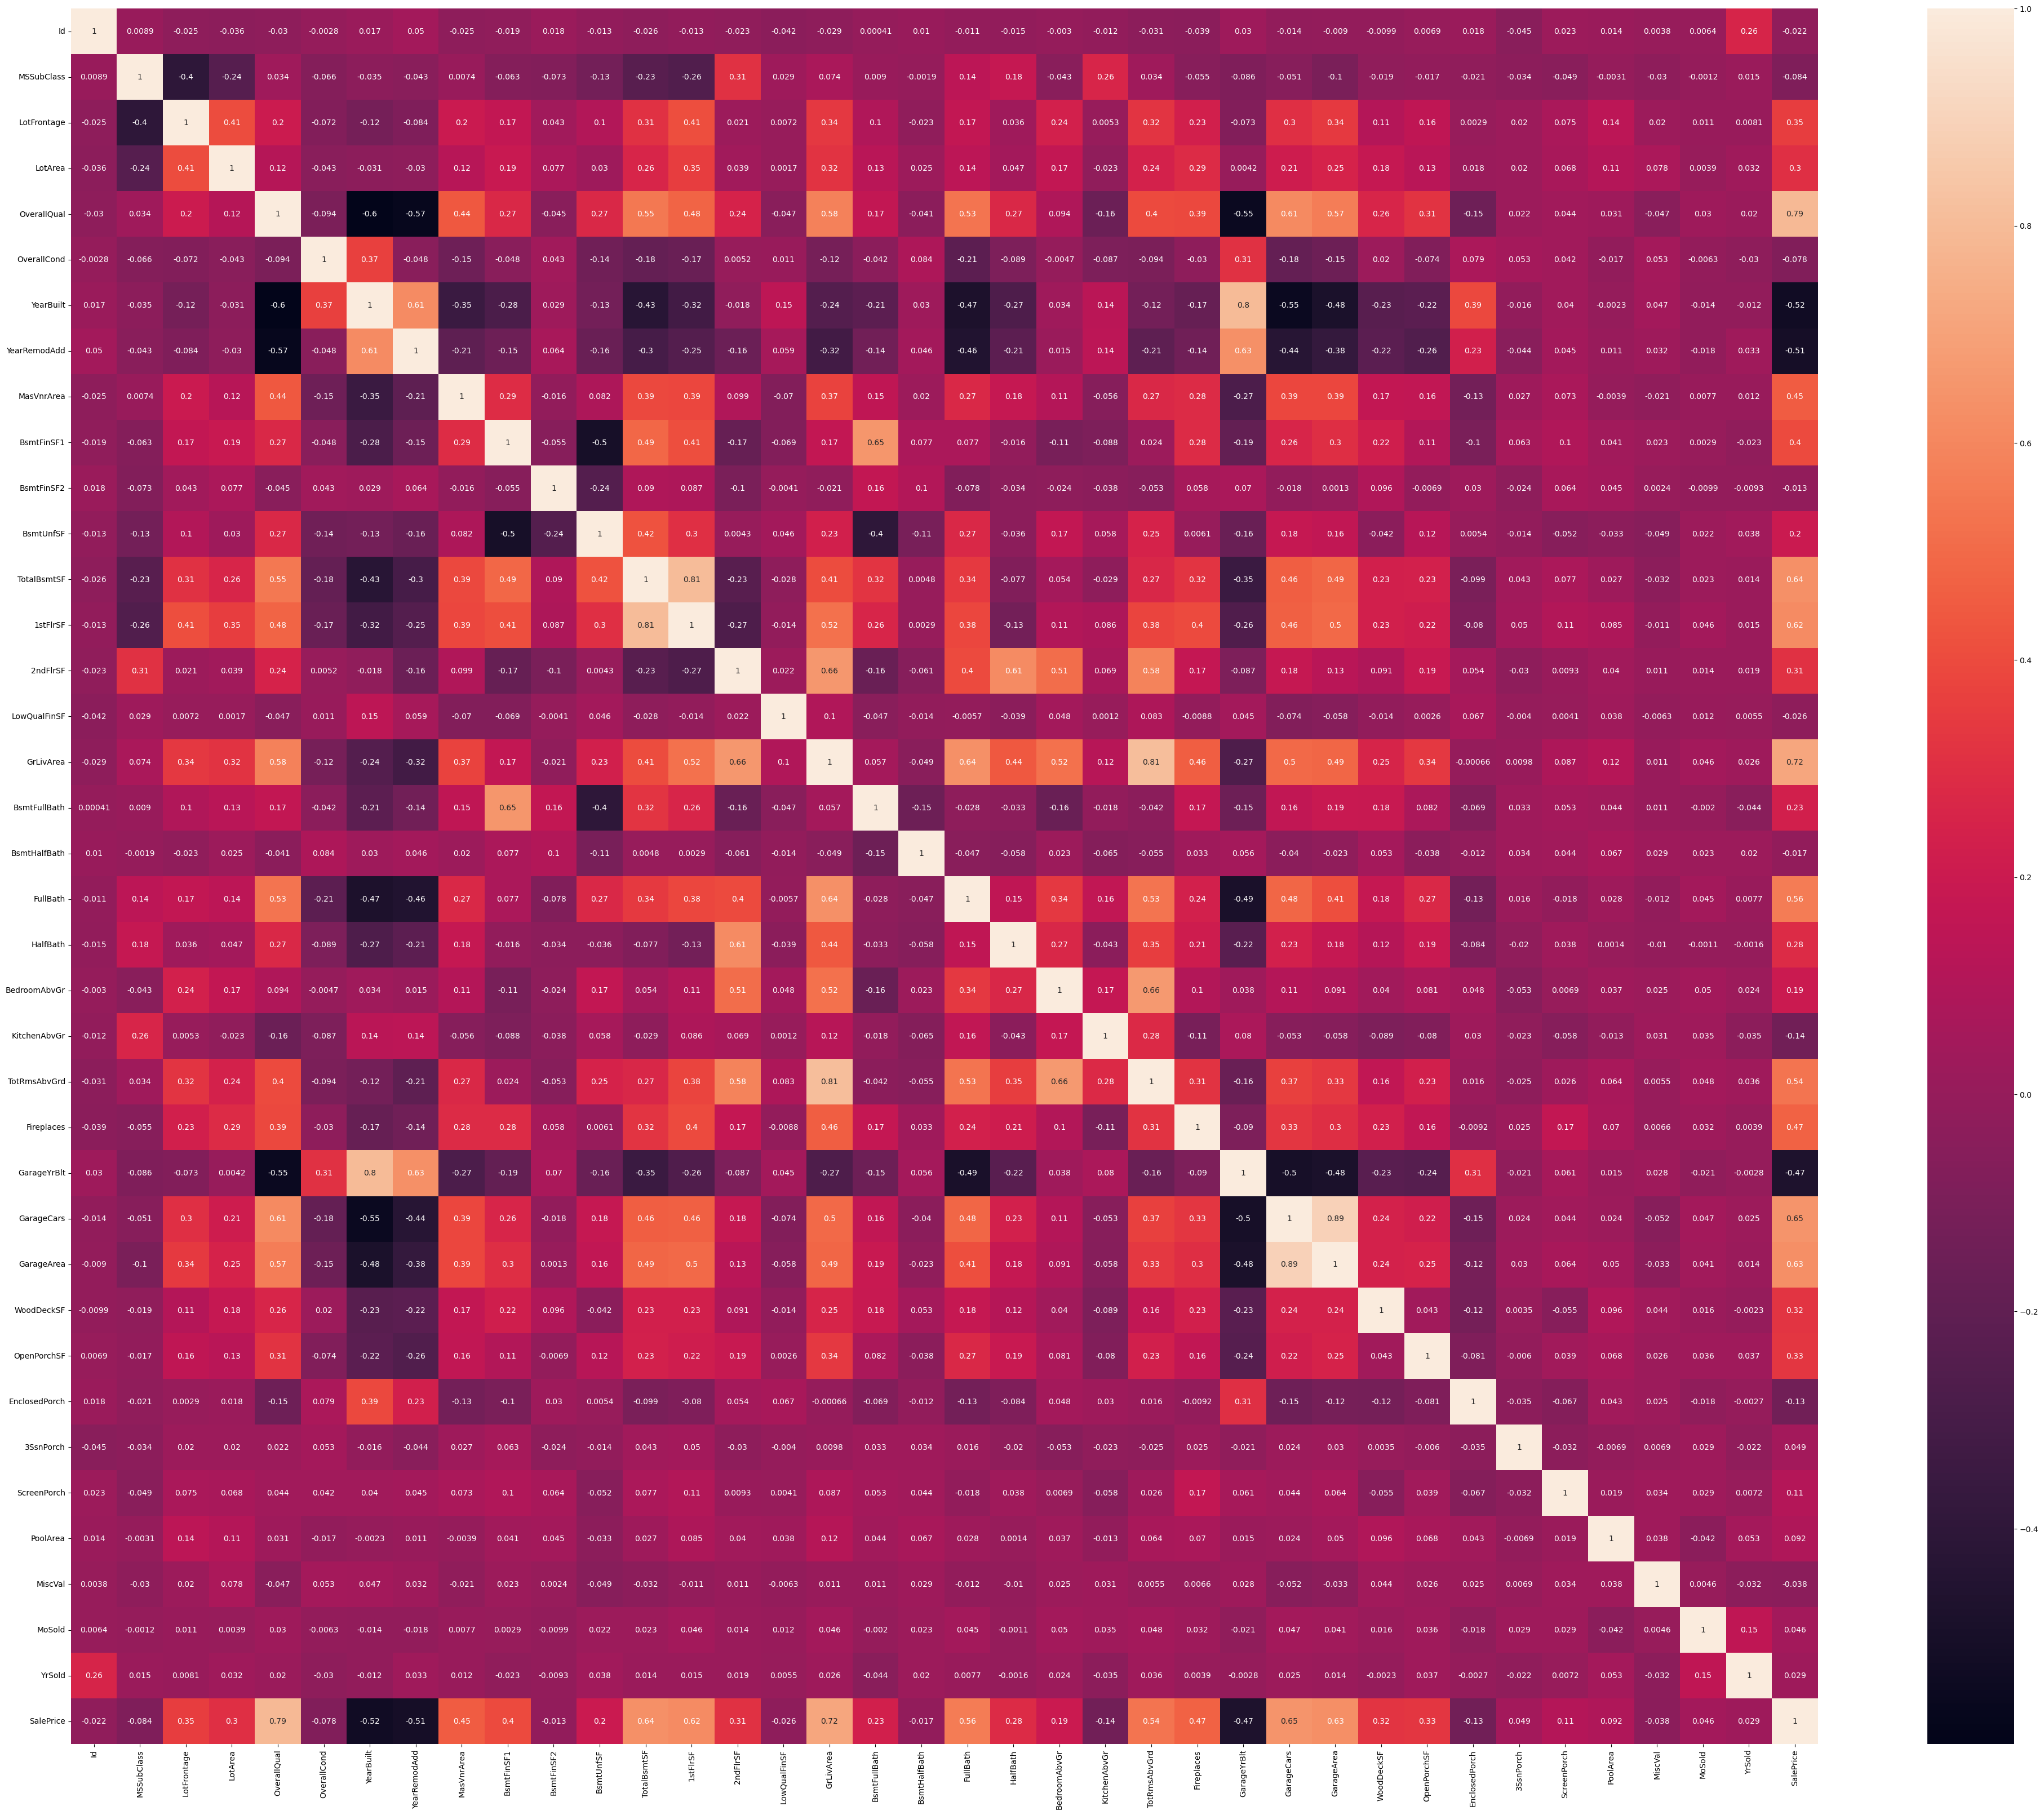

In [244]:

ax = plt.subplots(figsize = (50,40))
sns.heatmap(df.corr(),annot = True);

In [245]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave  Grvl      Reg   
1  1462          20       RL         81.0    14267   Pave  Grvl      IR1   
2  1463          60       RL         74.0    13830   Pave  Grvl      IR1   
3  1464          60       RL         78.0     9978   Pave  Grvl      IR1   
4  1465         120       RL         43.0     5005   Pave  Grvl      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6         62   
1       Norm     1Fam     1Story            6            6         65   
2       Norm     1Fam     2Story            5            5         26   
3       Norm     1Fam     2Story            6            6         25   
4       Norm   TwnhsE     1Story            8            5         31   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            62     Gable  CompShg     VinylSd     VinylSd       None   
1            65       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2            25     Gable  CompShg     VinylSd     VinylSd       None   
3            25     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4            31     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0          Gd   
1             1          Gd             6        Typ           0          Gd   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

# Modeling

In [246]:
df.to_excel("FullData_my.xlsx") 

In [247]:
df_model_train = df[1459:]

In [248]:
df_model_train.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.017342 -0.025978    -0.028365   
MSSubClass     0.011156    1.000000    -0.377214 -0.178590     0.032628   
LotFrontage   -0.017342   -0.377214     1.000000  0.340836     0.237007   
LotArea       -0.025978   -0.178590     0.340836  1.000000     0.129841   
OverallQual   -0.028365    0.032628     0.237007  0.129841     1.000000   
OverallCond    0.012609   -0.059316    -0.059490 -0.008542    -0.091932   
YearBuilt      0.012200   -0.028059    -0.121449 -0.021563    -0.573850   
YearRemodAdd   0.021998   -0.040581    -0.080410 -0.025290    -0.550684   
MasVnrArea    -0.041814    0.020839     0.173384  0.108091     0.417289   
BsmtFinSF1    -0.013066   -0.072842     0.150478  0.210634     0.227973   
BsmtFinSF2    -0.004888   -0.066355     0.047208  0.098986    -0.060442   
BsmtUnfSF     -0.005682   -0.139735     0.129269  0.005497     0.299208   
TotalBsmtSF   -0.023542   -0.256243     0.322056  0.268753     0.540497   
1stFlrSF       0.004484   -0.261954     0.381104  0.324249     0.471744   
2ndFlrSF       0.004974    0.309216     0.071141  0.067338     0.293308   
LowQualFinSF  -0.044230    0.046474     0.040634  0.007797    -0.030429   
GrLivArea      0.004964    0.076603     0.345951  0.301191     0.595727   
BsmtFullBath   0.002274    0.002470     0.082159  0.164321     0.112745   
BsmtHalfBath  -0.020155   -0.002333    -0.005457  0.049592    -0.040150   
FullBath       0.005587    0.131608     0.186419  0.144991     0.550600   
HalfBath       0.006784    0.177354     0.048894  0.029430     0.273458   
BedroomAbvGr   0.041722   -0.061772     0.267294  0.160368     0.127181   
KitchenAbvGr   0.002951    0.281721    -0.003921 -0.018928    -0.183882   
TotRmsAbvGrd   0.021054    0.031306     0.323558  0.221240     0.436571   
Fireplaces    -0.018479   -0.045160     0.227984  0.301718     0.396451   
GarageYrBlt   -0.000121   -0.079867    -0.067237  0.021000    -0.518996   
GarageCars     0.013672   -0.044390     0.286916  0.188068     0.609512   
GarageArea     0.016783   -0.099916     0.325364  0.220130     0.563377   
WoodDeckSF    -0.028916   -0.012110     0.080968  0.202241     0.238829   
OpenPorchSF   -0.001877   -0.004939     0.139027  0.113173     0.318678   
EnclosedPorch  0.005107   -0.012931     0.004967 -0.020821    -0.117781   
3SsnPorch     -0.040795   -0.039888     0.060486  0.028784     0.030853   
ScreenPorch   -0.000967   -0.027001     0.042563  0.057559     0.063526   
PoolArea       0.057044    0.008283     0.148440  0.097859     0.065166   
MiscVal       -0.004952   -0.016119     0.004463  0.076394    -0.058736   
MoSold         0.021172   -0.013585     0.011937  0.000497     0.070815   
YrSold        -0.000712    0.021407    -0.005879  0.023524     0.027347   
SalePrice     -0.021917   -0.084284     0.354863  0.302582     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609   0.012200      0.021998   -0.041814   -0.013066   
MSSubClass       -0.059316  -0.028059     -0.040581    0.020839   -0.072842   
LotFrontage      -0.059490  -0.121449     -0.080410    0.173384    0.150478   
LotArea          -0.008542  -0.021563     -0.025290    0.108091    0.210634   
OverallQual      -0.091932  -0.573850     -0.550684    0.417289    0.227973   
OverallCond       1.000000   0.376251     -0.073741   -0.139187   -0.044182   
YearBuilt         0.376251   1.000000      0.594314   -0.351223   -0.252697   
YearRemodAdd     -0.073741   0.594314      1.000000   -0.188646   -0.125977   
MasVnrArea       -0.139187  -0.351223     -0.188646    1.000000    0.249716   
BsmtFinSF1       -0.044182  -0.252697     -0.125977    0.249716    1.000000   
BsmtFinSF2        0.041217   0.050466      0.068520   -0.076869   -0.049907   
BsmtUnfSF        -0.135083  -0.141992     -0.176810    0.105697   -0.528194   
TotalBsmtSF      -0.184243  -0.412772     -0.301846    0.359794    0

<AxesSubplot:>

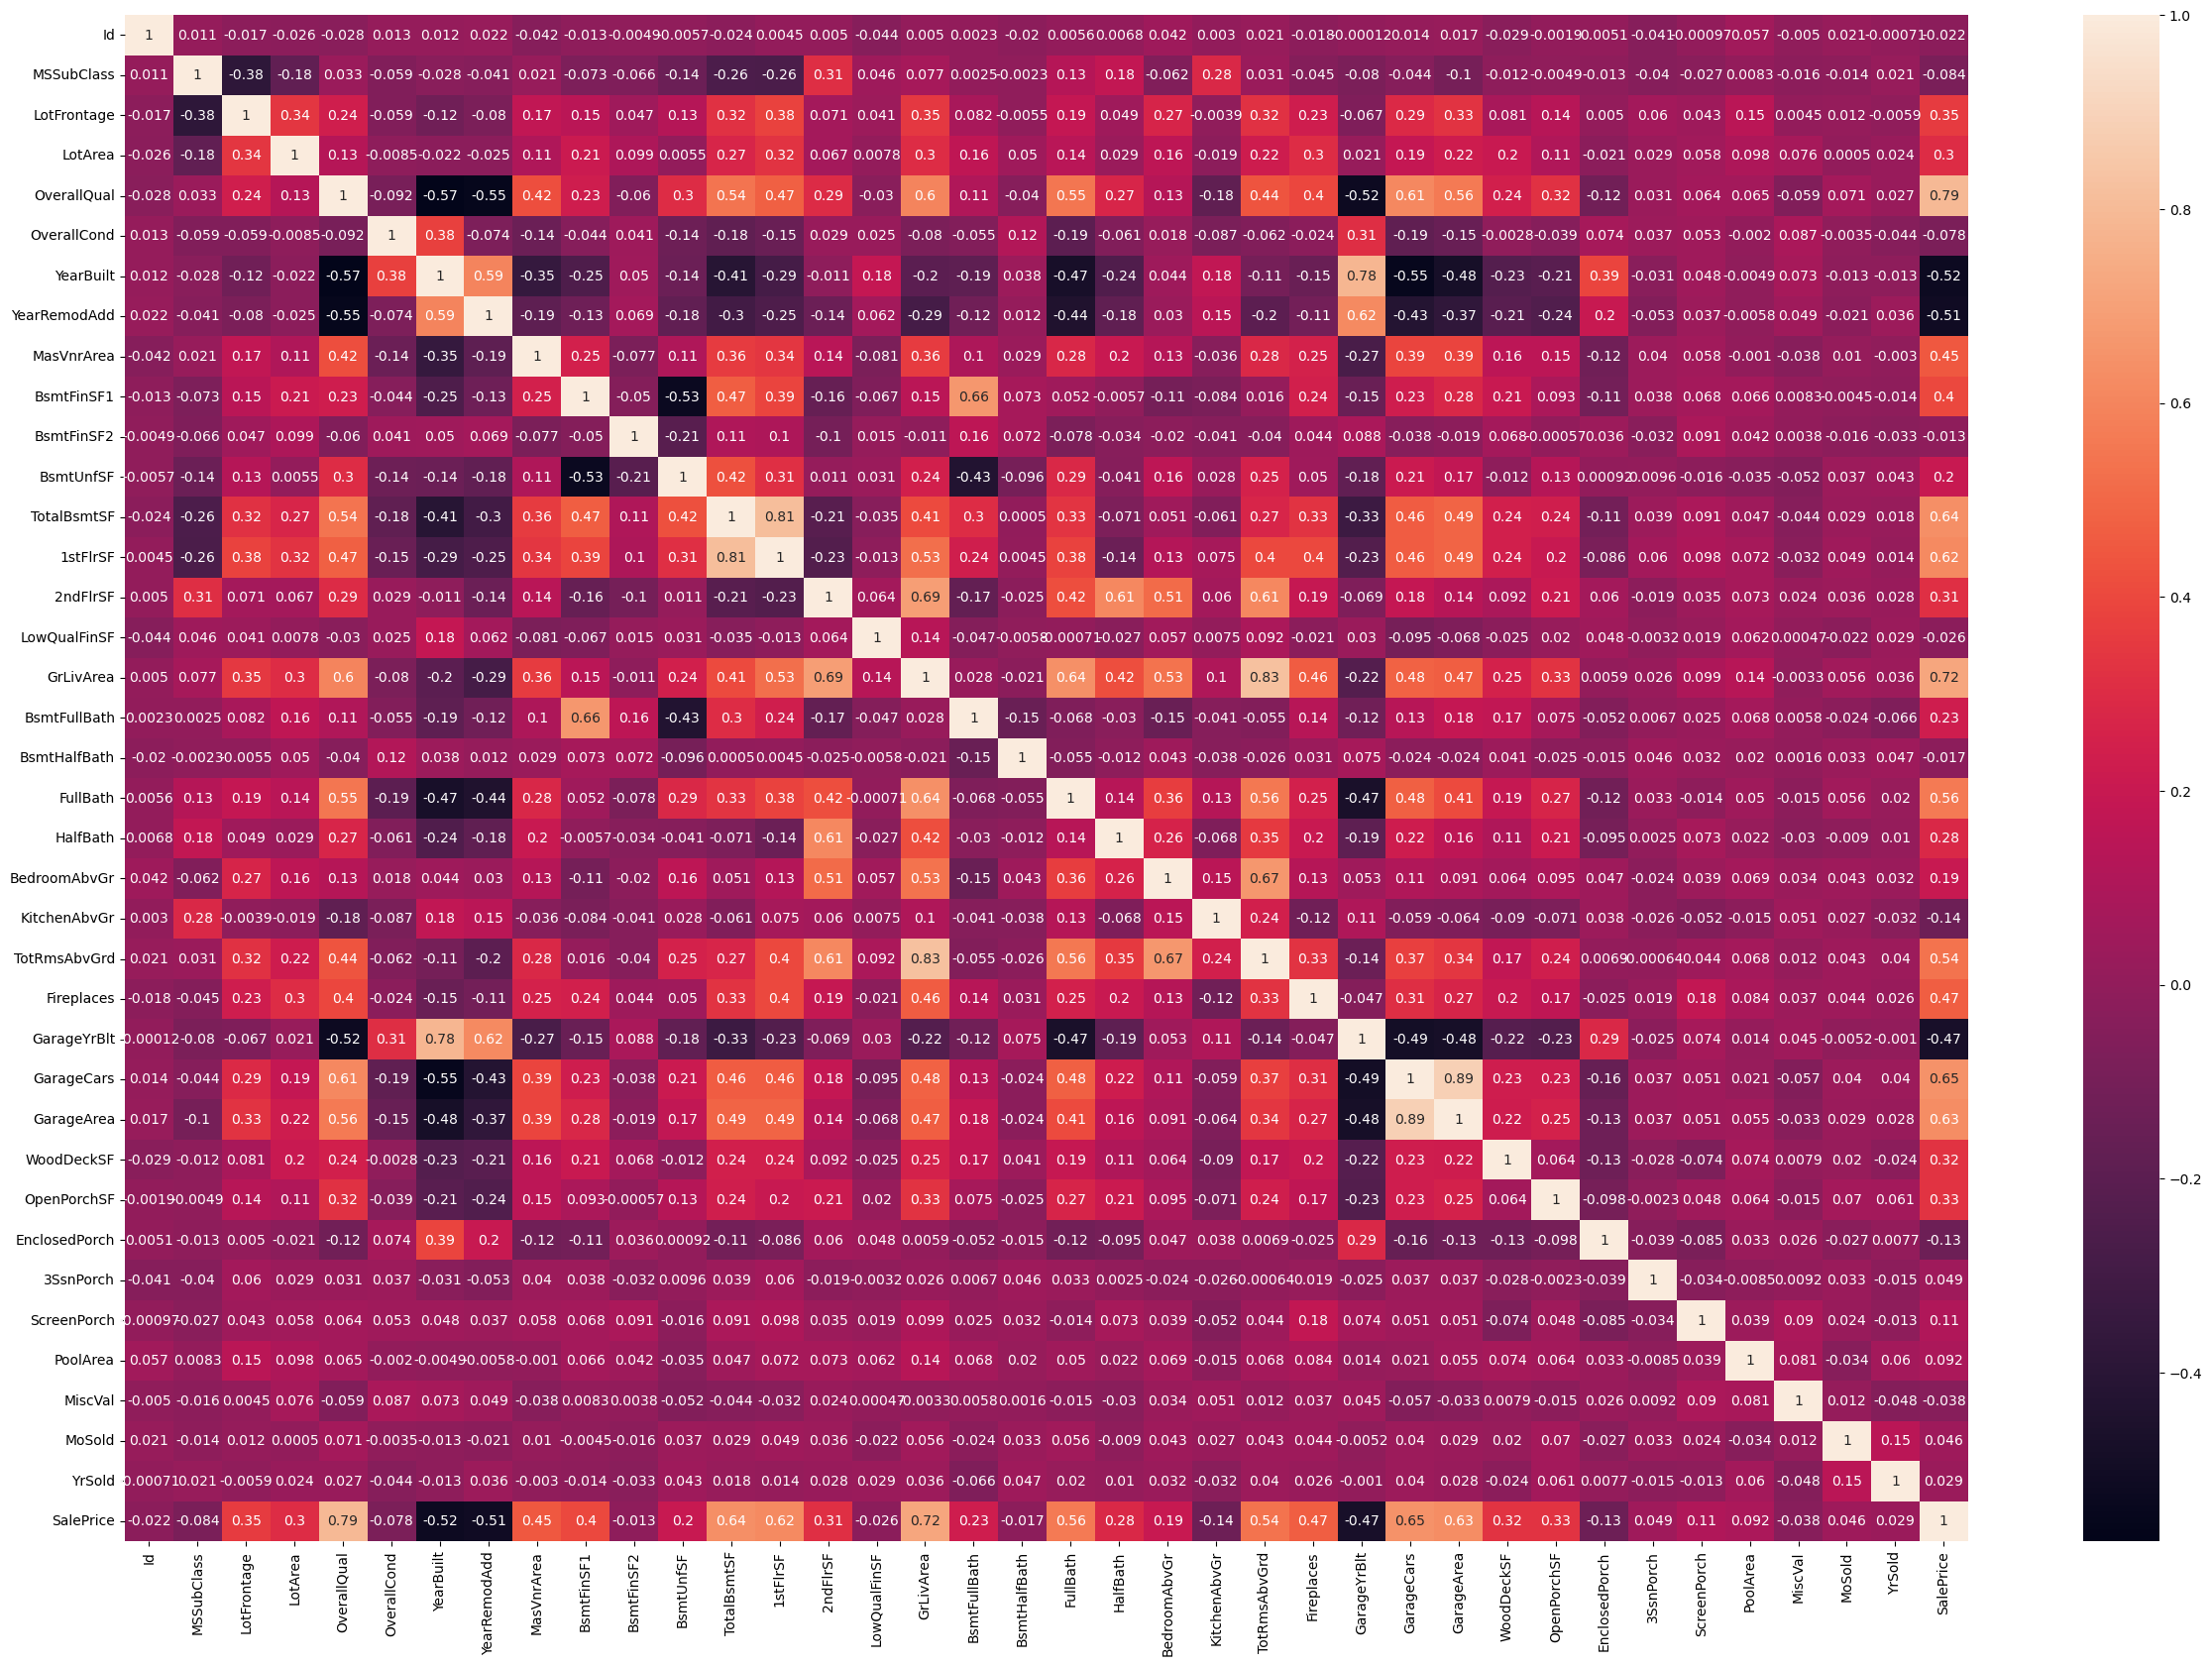

In [249]:
plt.figure(figsize=(30,20))
sns.heatmap(df_model_train.corr(),annot=True)

In [250]:
abs(df.corr()['SalePrice']).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.718746
GarageCars       0.646652
TotalBsmtSF      0.637079
GarageArea       0.626528
1stFlrSF         0.616229
FullBath         0.560664
TotRmsAbvGrd     0.536067
YearBuilt        0.523734
YearRemodAdd     0.507101
GarageYrBlt      0.471062
Fireplaces       0.469543
MasVnrArea       0.450939
BsmtFinSF1       0.398450
LotFrontage      0.354863
OpenPorchSF      0.327260
WoodDeckSF       0.324439
2ndFlrSF         0.312075
LotArea          0.302582
HalfBath         0.284108
BsmtFullBath     0.228364
BsmtUnfSF        0.199015
BedroomAbvGr     0.194765
KitchenAbvGr     0.135907
EnclosedPorch    0.131413
ScreenPorch      0.108864
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
3SsnPorch        0.049364
MoSold           0.046432
MiscVal          0.037720
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
BsmtHalfBath     0.016844
BsmtFinSF2       0.013262
Name: SalePr

In [251]:
df=pd.get_dummies(df,drop_first=True)

In [252]:
df.to_excel("FullData_my.xlsx") 

In [253]:
df.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0  1461          20         80.0    11622            5            6   
1  1462          20         81.0    14267            6            6   
2  1463          60         74.0    13830            5            5   
3  1464          60         78.0     9978            6            6   
4  1465         120         43.0     5005            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         62            62         0.0       468.0       144.0      270.0   
1         65            65       108.0       923.0         0.0      406.0   
2         26            25         0.0       791.0         0.0      137.0   
3         25            25        20.0       602.0         0.0      324.0   
4         31            31         0.0       263.0         0.0     1017.0   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        882.0       896         0             0        896           0.0   
1       1329.0      1329         0             0       1329           0.0   
2        928.0       928       701             0       1629           0.0   
3        926.0       926       678             0       1604           0.0   
4       1280.0      1280         0             0       1280           0.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0           0.0         1         0             2             1             5   
1           0.0         1         1             3             1             6   
2           0.0         2         1             3             1             6   
3           0.0         2         1             3             1             7   
4           0.0         2         0             2             1             5   

   Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0           0         62.0         1.0       730.0         140            0   
1           0         65.0         1.0       312.0         393           36   
2           1         26.0         2.0       482.0         212           34   
3           1         25.0         2.0       470.0         360           36   
4           0         31.0         2.0       506.0           0           82   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0          120         0        0       6      13   
1              0          0            0         0     1750       6      13   
2              0          0            0         0        0       3      13   
3              0          0            0         0        0       6      13   
4              0          0          144         0        0       1      13   

   SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0        NaN            0            1            0            0            1   
1        NaN            0            0            1            0            1   
2        NaN            0            0            1            0            1   
3        NaN            0            0            1            0            1   
4        NaN            0            0            1            0            1   

   Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0           0             0             0             1                0   
1           0             0             0             0                0   
2           0             0             0             0                0   
3           0             0             0             0                0   
4           0             0             0             0                1   

   LandContour_Low  LandContour_Lvl  ...  KitchenQual_Gd  KitchenQual_TA  \
0                0                1  ...               0               1   
1                0                1  ...               1               0   
2                0                1  ...   

In [254]:
x,y=df[1459:].drop("SalePrice",axis=1),df[1459:][['SalePrice']]

In [255]:
x.shape,y.shape

((1460, 246), (1460, 1))

In [256]:
### Regression Modelleri için Bir Function Create Ediyoruz
def fnc_regression_all_model(x,y,predict_test):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
    
    fnc_regression_all_model.predict1_df2_survived=GBR.predict(predict_test)
    
    
    return result.sort_values('R_Squared',ascending=False)

In [257]:
Model_Predict=df[:1459].drop('SalePrice',axis=1)

In [258]:
Model_Predict.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0  1461          20         80.0    11622            5            6   
1  1462          20         81.0    14267            6            6   
2  1463          60         74.0    13830            5            5   
3  1464          60         78.0     9978            6            6   
4  1465         120         43.0     5005            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         62            62         0.0       468.0       144.0      270.0   
1         65            65       108.0       923.0         0.0      406.0   
2         26            25         0.0       791.0         0.0      137.0   
3         25            25        20.0       602.0         0.0      324.0   
4         31            31         0.0       263.0         0.0     1017.0   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        882.0       896         0             0        896           0.0   
1       1329.0      1329         0             0       1329           0.0   
2        928.0       928       701             0       1629           0.0   
3        926.0       926       678             0       1604           0.0   
4       1280.0      1280         0             0       1280           0.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0           0.0         1         0             2             1             5   
1           0.0         1         1             3             1             6   
2           0.0         2         1             3             1             6   
3           0.0         2         1             3             1             7   
4           0.0         2         0             2             1             5   

   Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0           0         62.0         1.0       730.0         140            0   
1           0         65.0         1.0       312.0         393           36   
2           1         26.0         2.0       482.0         212           34   
3           1         25.0         2.0       470.0         360           36   
4           0         31.0         2.0       506.0           0           82   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0          120         0        0       6      13   
1              0          0            0         0     1750       6      13   
2              0          0            0         0        0       3      13   
3              0          0            0         0        0       6      13   
4              0          0          144         0        0       1      13   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            1            0            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0           0             0             0             1                0   
1           0             0             0             0                0   
2           0             0             0             0                0   
3           0             0             0             0                0   
4           0             0             0             0                1   

   LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  ...  KitchenQual_Gd  \
0                0                1                 0  ...               0   
1                0                1                 0  ...               1   
2                0                1                 0  ...               0   
3                0       

In [259]:
x.shape,y.shape,Model_Predict.shape

((1460, 246), (1460, 1), (1459, 246))

In [260]:
y.head()

SalePrice
1459   208500.0
1460   181500.0
1461   223500.0
1462   140000.0
1463   250000.0

In [261]:
fnc_regression_all_model(x,y,Model_Predict)

R_Squared          RMSE           MAE
GradientBoostingRegressor   0.899145  27813.522098  17563.968831
Ridge                       0.876565  30769.843108  19114.587846
ExtraTreeRegressor          0.845368  34439.458636  23767.986301
ElasticNet                  0.834713  35606.243115  20218.437401
Lasso                       0.795474  39607.797396  19373.889551
LinearRegression            0.775880  41461.732473  19641.781572
KNeighborsRegressor         0.696695  48233.303070  29344.792466

In [262]:
test_data_result=pd.DataFrame()
test_data_result["Id"]=df[:1459]["Id"]
test_data_result["SalePrice"]=fnc_regression_all_model.predict1_df2_survived

In [264]:
test_data_result.to_csv("housepriceregression.csv") 

# PyCaret Regression Tahminleme Yapalım

In [ ]:
#pip install pycaret

In [265]:
from pycaret.regression import*

In [266]:
exp_name=setup(df_model_train,target='SalePrice')

In [267]:
best_model=compare_models()

Processing:   0%|          | 0/81 [00:00<?, ?it/s]